## Objectives

* The main objective of this section is to test different clustering models to find the best viable algorithm.

# 7.0 Model Testing

In [ ]:
# defining two spaces of data (embedded and rescaled) to test models

# tree embedded data
df_tree = pd.DataFrame()
df_tree['embedding_x'] =  res_umap[:,0]
df_tree['embedding_y'] =  res_umap[:,1]

# rescaled data
df7 = df6.copy()

Below we will test the modeling using some of the main clustering algorithms.

**How will models be evaluated?** From how well the clusters are separated and the silhouette coefficient

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

## 7.1 KMeans

k-means clustering tries to group similar kinds of items in form of clusters. It finds the similarity between the items and groups them into the clusters.

### 7.1.1 Rescaled Data

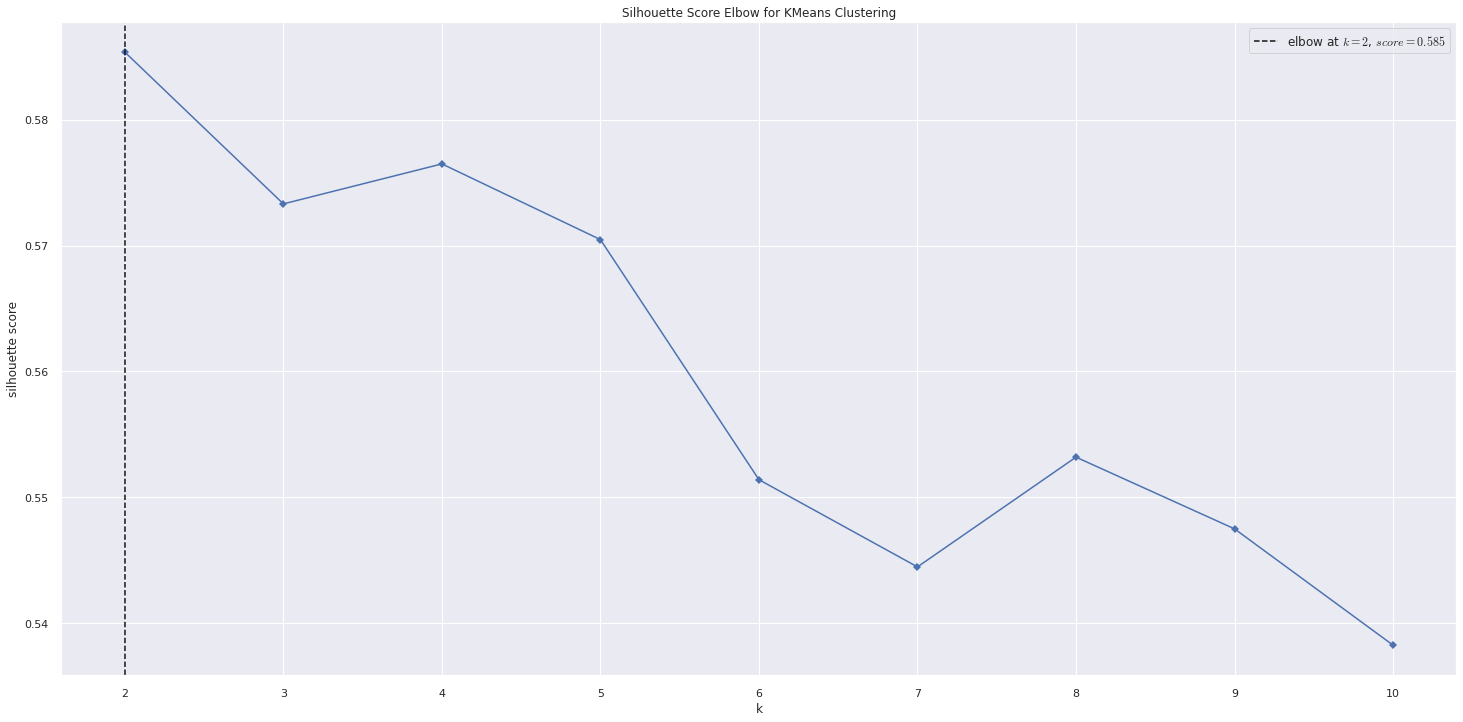

In [ ]:
kmeans = KMeans( random_state = 42)
visualizer = KElbowVisualizer(kmeans, k=(2,11), timings = False, metric = 'silhouette' )
visualizer.fit(df7)
visualizer.finalize();

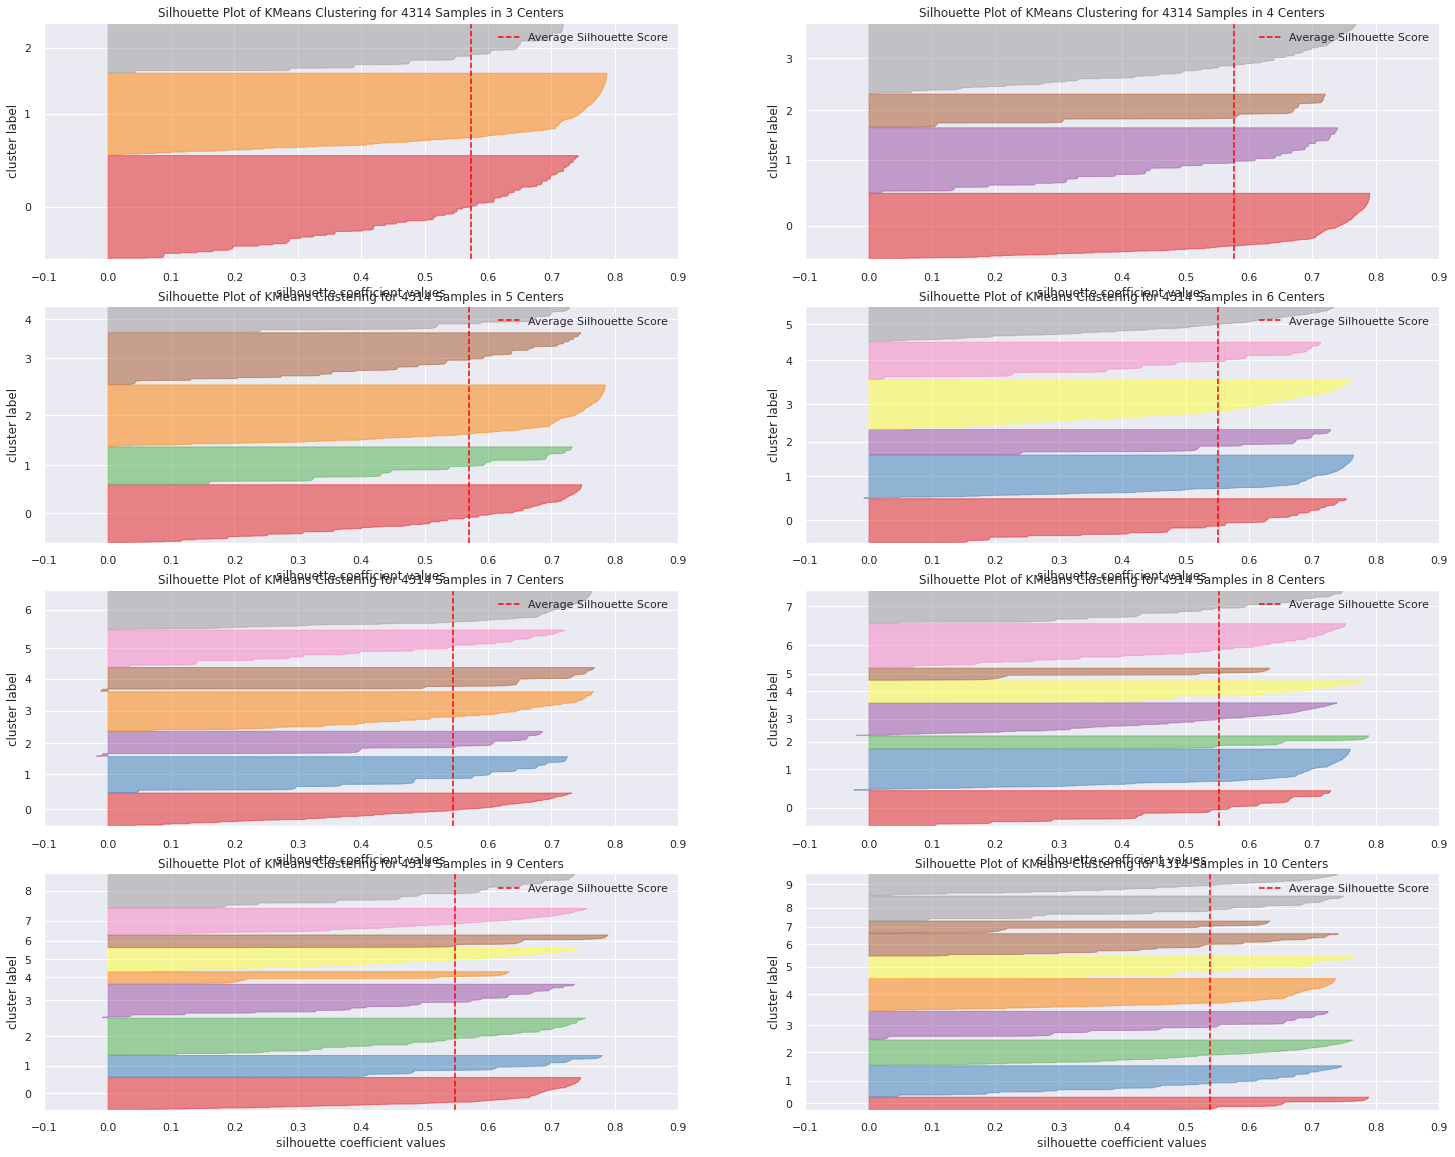

In [ ]:
clusters = np.arange(3, 11)

# figure to plot
fig, ax = plt.subplots(4,2, figsize = (25,20) )
kmeans_silhouette = []

for idx, n_clusters in enumerate(clusters):
    # defining model
    kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
    
    # getting row and col
    row, col = divmod(idx, 2)
    
    # calculating silhouette score
    labels = kmeans.fit_predict(df7.values)
    sil = silhouette_score( df7, labels)
    kmeans_silhouette.append(sil)
    
    # applying model
    model = SilhouetteVisualizer( kmeans, ax = ax[row][col] )
    model.fit(df7.values)
    model.finalize()

In [ ]:
# calculating silhouette score for evaluation
kmeans_silhouette = []
for n_clusters in range(2,13):
    # defining model
    kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
      
    # calculating silhouette score
    labels = kmeans.fit_predict(df7.values)
    sil = silhouette_score( df7, labels)
    kmeans_silhouette.append(sil)

In [ ]:
kmeans_silhouette

[0.585361059197748,
 0.5733093339121637,
 0.5764844580613402,
 0.5704733971727258,
 0.551406142783771,
 0.5444800882848863,
 0.5531965054082899,
 0.5475022352998246,
 0.5382658485078169,
 0.5348426953067531,
 0.5323920690260653]

### 7.1.2 Embedded Data

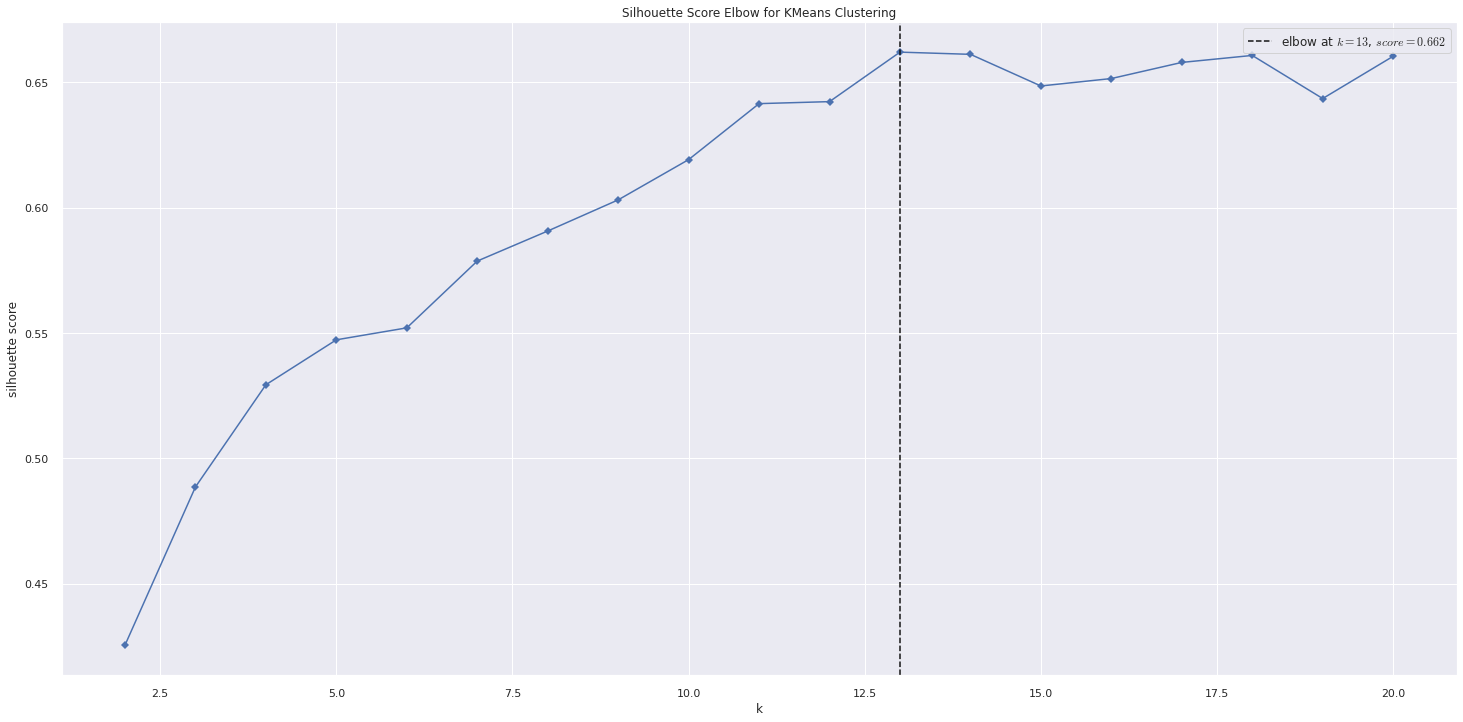

In [ ]:
kmeans = KMeans( random_state = 42)
visualizer = KElbowVisualizer(kmeans, k=(2,21), timings = False, metric = 'silhouette' )
visualizer.fit(df_tree)
visualizer.finalize();

In [ ]:
# calculating silhouette score for evaluation
n_max = 20

clusters = np.arange(2, n_max+1, 1)

kmeans_silhouette_emb = []
for n_clusters in clusters:
    # defining model
    kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
      
    # calculating silhouette score
    labels = kmeans.fit_predict(df_tree.values)
    sil = silhouette_score( df_tree, labels)
    kmeans_silhouette_emb.append(sil)

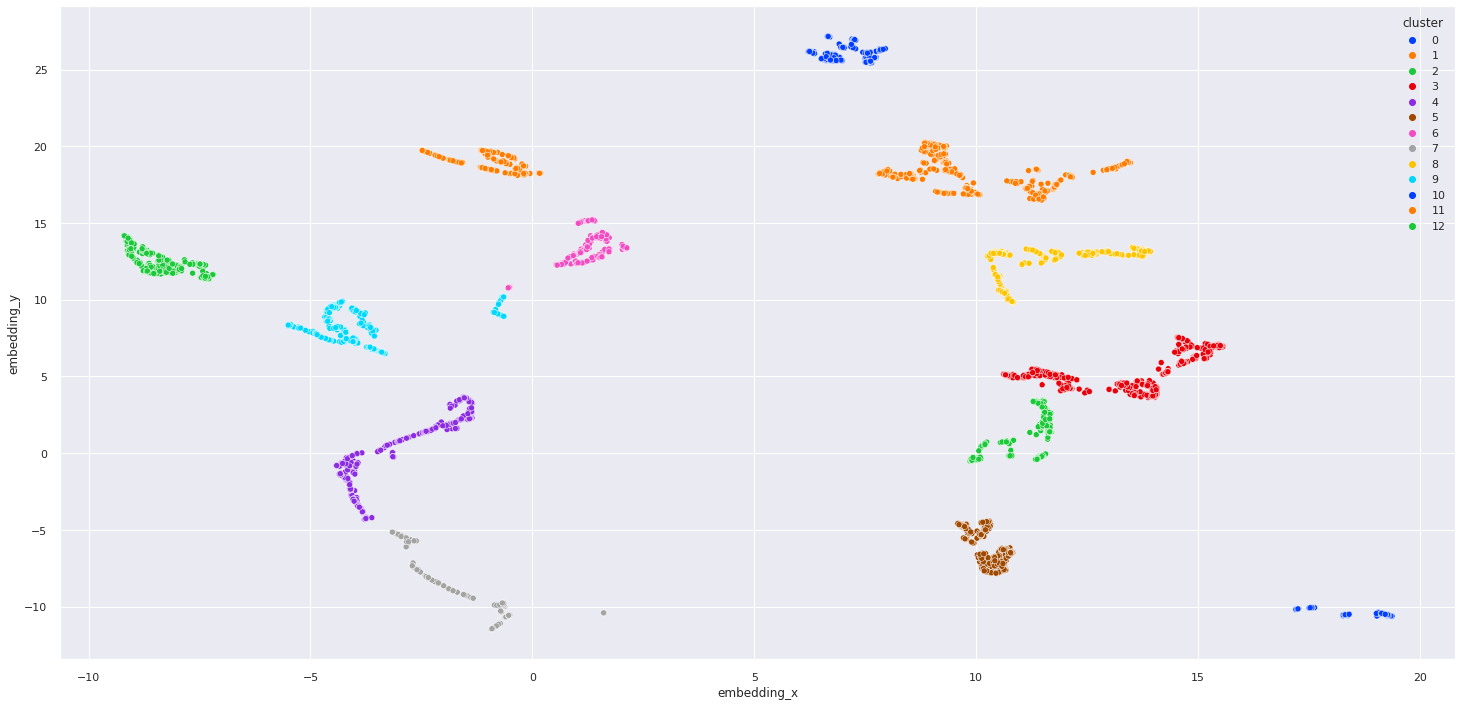

In [ ]:
n_clusters = 13

kmeans = KMeans(n_clusters = n_clusters, random_state = 42)

labels = kmeans.fit_predict(df_tree)

df_res = df_tree.copy()
df_res['cluster'] = labels

sns.scatterplot(data = df_res, x = 'embedding_x', y = 'embedding_y', hue = 'cluster', palette = 'bright');

## 7.2 Hierarchical Clustering


### 7.2.1 Rescaled Data

In [ ]:
# defining model 
hc_model = hc.linkage( pd.DataFrame(df7), 'ward' )

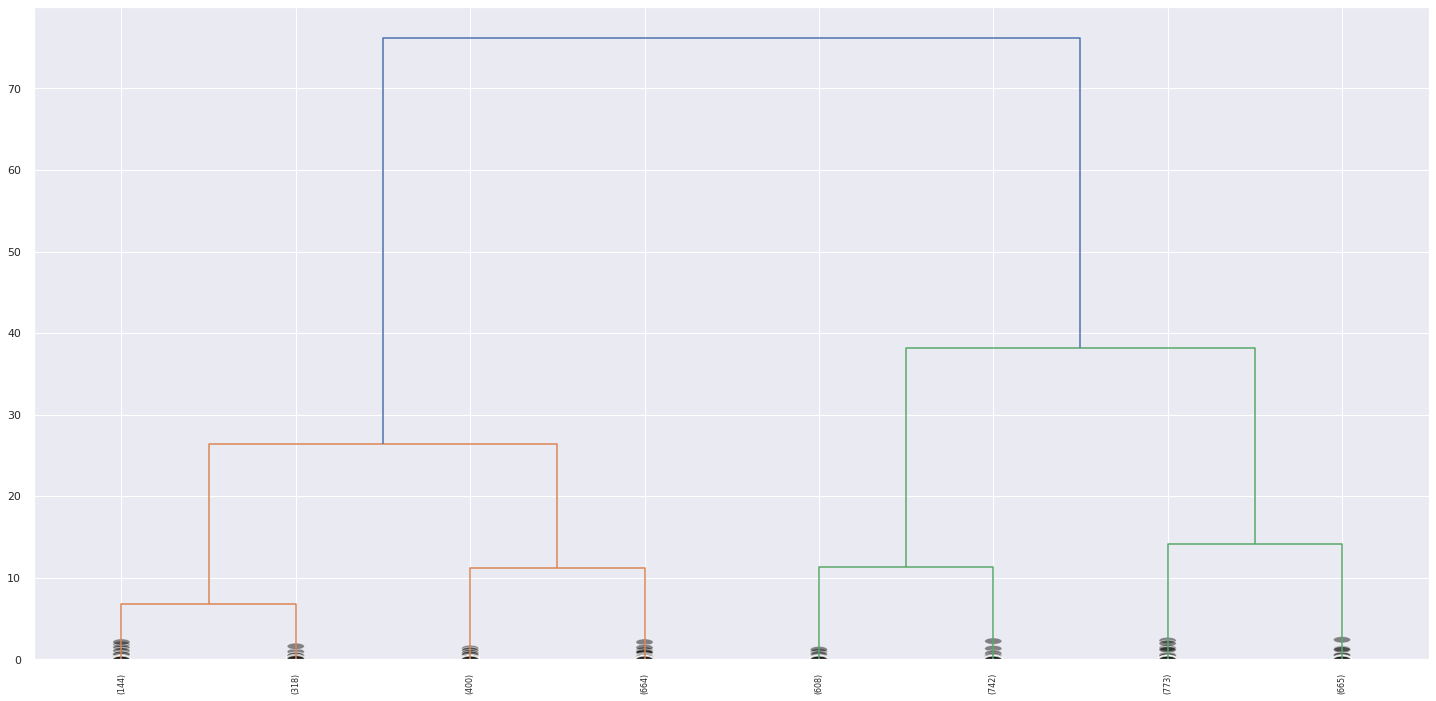

In [ ]:
hc.dendrogram( hc_model, truncate_mode='lastp', p = 8,  leaf_rotation = 90, leaf_font_size = 8,  show_contracted=True)

plt.plot();

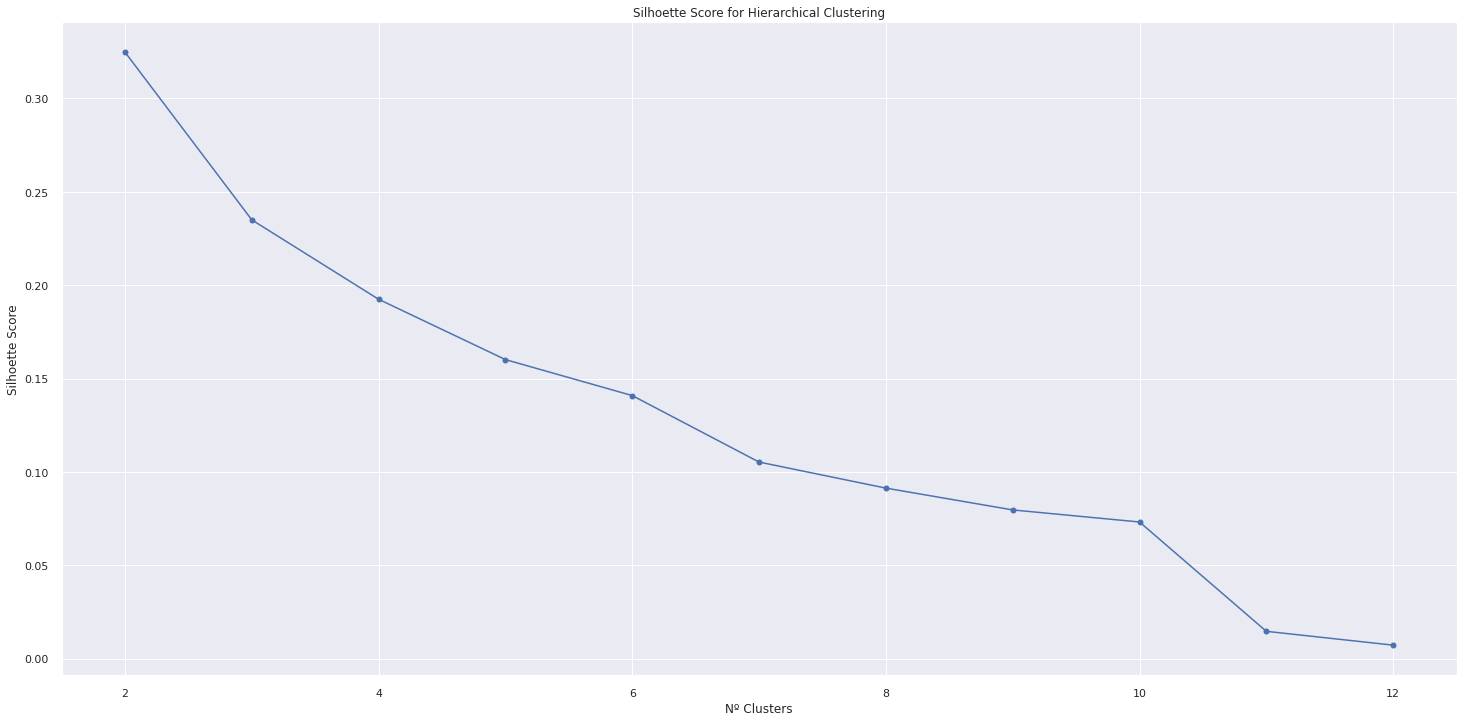

In [ ]:
# HC
n_max = 12

hc_silhouette = []
for n_clusters in range(2, n_max + 1):
    # define model
    hc_model = hc.linkage(df7, 'ward')

    labels = hc.fcluster(hc_model, t = n_clusters, criterion = 'maxclust')
    # get labels

    # metric
    sil = silhouette_score(df_prep, labels)
    hc_silhouette.append(sil)

# ploting silhouette
plt.title('Silhoette Score for Hierarchical Clustering')
plt.xlabel('Nº Clusters')
plt.ylabel('Silhoette Score')
plt.plot( range(2, n_max + 1) , hc_silhouette, marker = 'o', color = 'b');

### 7.2.2 Embedded Data

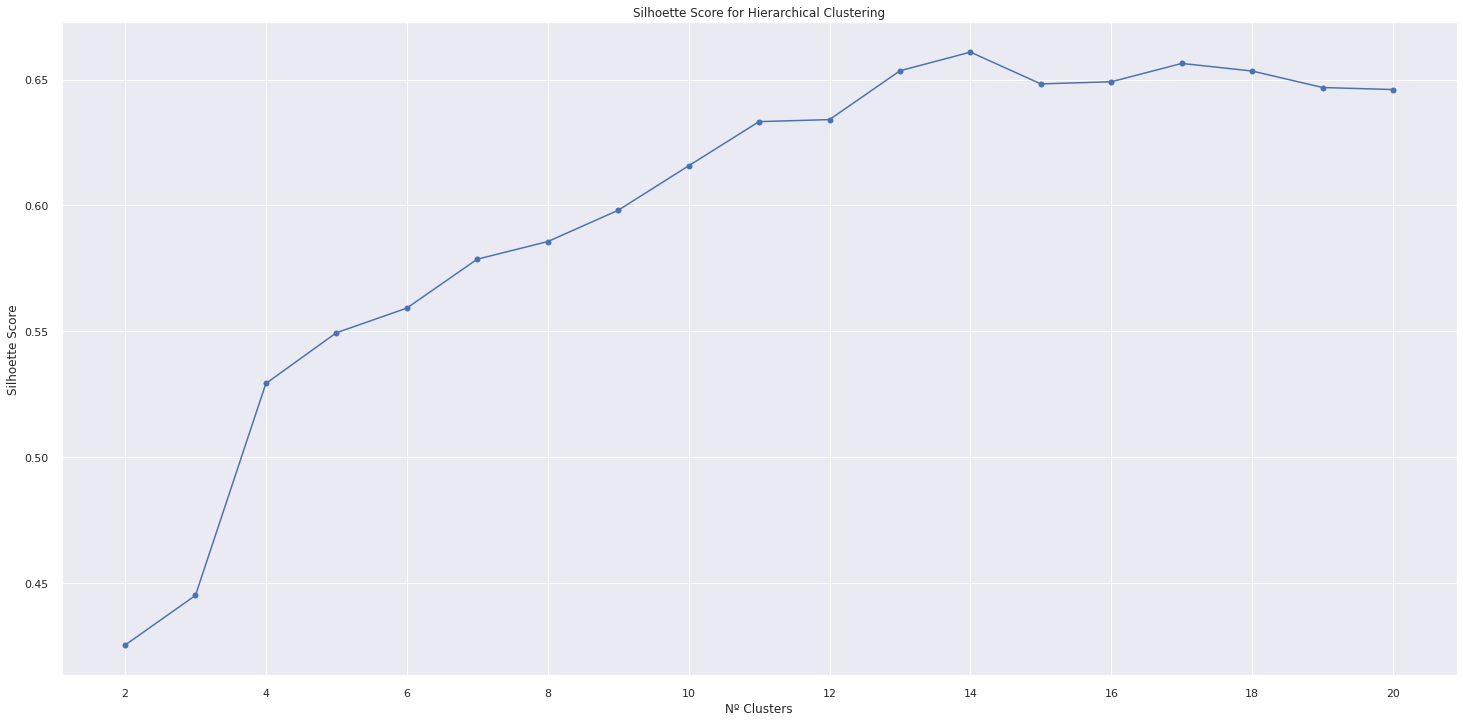

In [ ]:
# HC
n_max = 20

hc_silhouette_emb = []
for n_clusters in range(2, n_max + 1):
    # define model
    hc_model = hc.linkage(df_tree, 'ward')

    labels = hc.fcluster(hc_model, t = n_clusters, criterion = 'maxclust')
    # get labels

    # metric
    sil = silhouette_score(df_tree, labels)
    hc_silhouette_emb.append(sil)

# ploting silhouette
plt.title('Silhoette Score for Hierarchical Clustering')
plt.xlabel('Nº Clusters')
plt.ylabel('Silhoette Score')
plt.xticks(np.arange(2, n_max+1, 2) )
plt.plot( range(2, n_max + 1) , hc_silhouette_emb, marker = 'o', color = 'b');

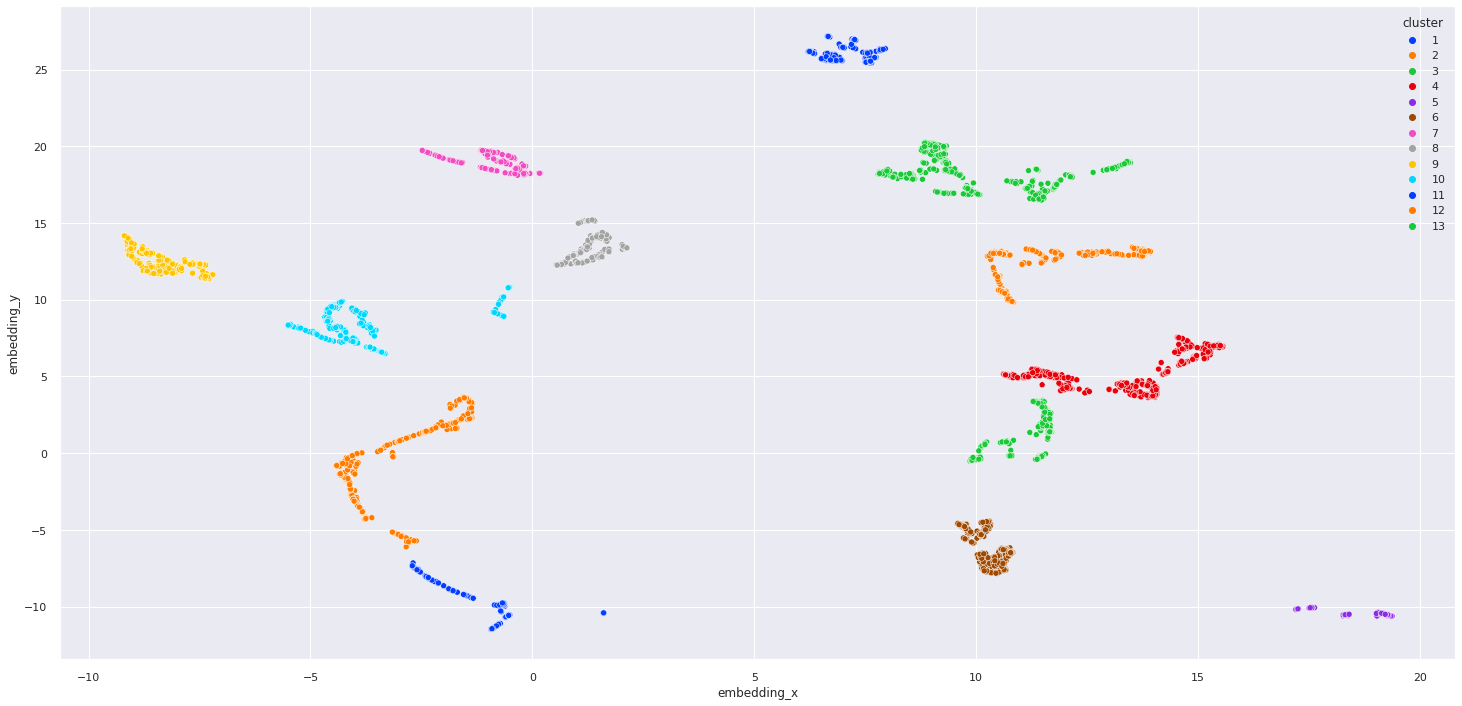

In [ ]:
# plotting embedded space with clusters
n_clusters = 13

hc_model = hc.linkage(df_tree, 'ward')

labels = hc.fcluster(hc_model, t = n_clusters, criterion = 'maxclust')

df_res = df_tree.copy()
df_res['cluster'] = labels

sns.scatterplot(data = df_res, x = 'embedding_x', y = 'embedding_y', hue = 'cluster', palette = 'bright');

## 7.3 DBSCAN

### 7.3.1 Rescaled Data

In [ ]:
# hyperparameters
eps = 0.3
min_samples = 20

# defining model
db_model = DBSCAN( eps = eps, min_samples = min_samples, metric = 'euclidean')
labels = db_model.fit_predict(df7)

print( 'Silhouette Score: {:,.4f}'.format(silhouette_score(df7, labels)) )
print( 'Number of Clusters: {}'.format(len(np.unique(labels))) )
print( 'Clusters: {}'.format(np.unique(labels)) )

Silhouette Score: 0.3581
Number of Clusters: 3
Clusters: [-1  0  1]


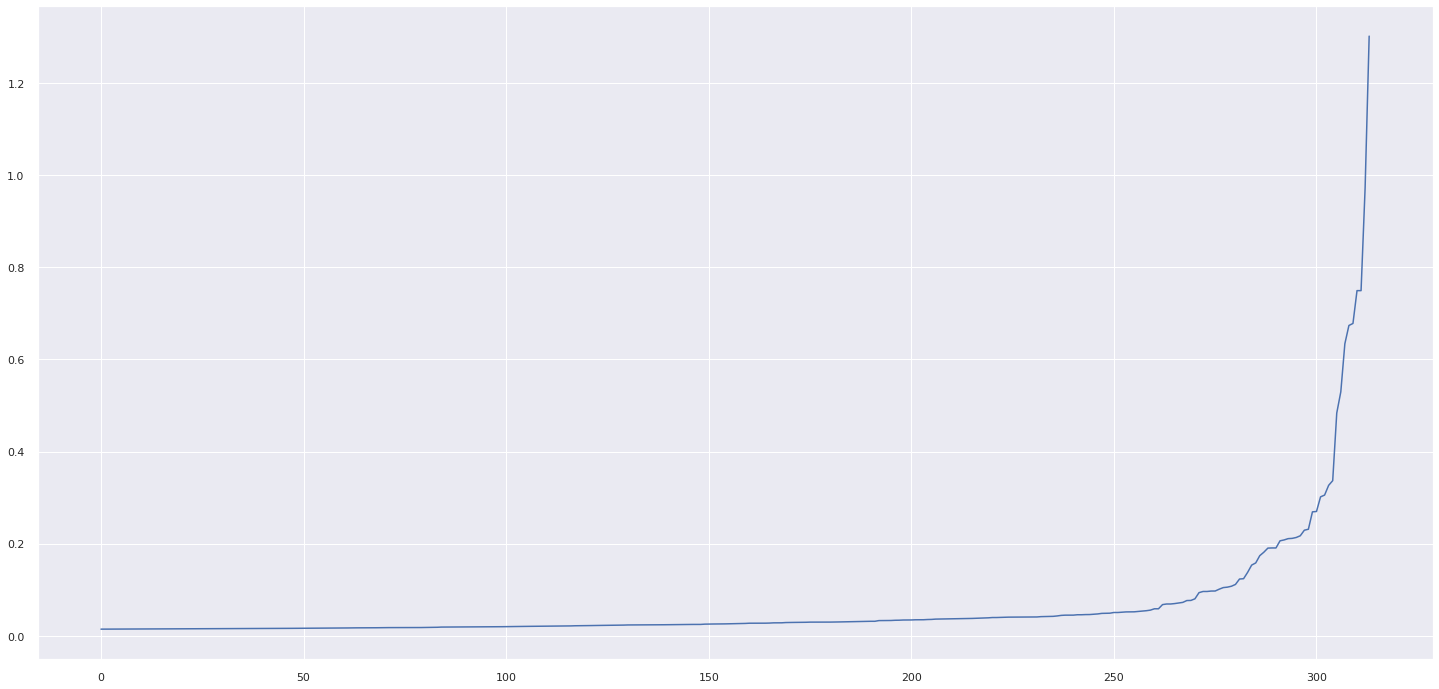

In [ ]:
# Tuning DBSAN

from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors = 2)

nbrs.fit(df7)

dist, idx = nbrs.kneighbors(df7)

distances = np.sort(dist, axis = 0)

# # full distances array for the last neighbor
# plt.plot(distances[:, 9]);

# distances array for the last neighbor starting from the 4000th neighbor
plt.plot(distances[4000:, 1]);



In [ ]:
# hyperparameters
eps = 0.2
min_samples = 20

# defining model
db_model = DBSCAN( eps = eps, min_samples = min_samples, metric = 'euclidean')
labels = db_model.fit_predict(df7)

print( 'Silhouette Score: {:,.4f}'.format(silhouette_score(df7, labels)) )
print( 'Number of Clusters: {}'.format(len(np.unique(labels))) )
print( 'Clusters: {}'.format(np.unique(labels)) )

# the results were not satisfactory using the proposed method

Silhouette Score: 0.3405
Number of Clusters: 4
Clusters: [-1  0  1  2]


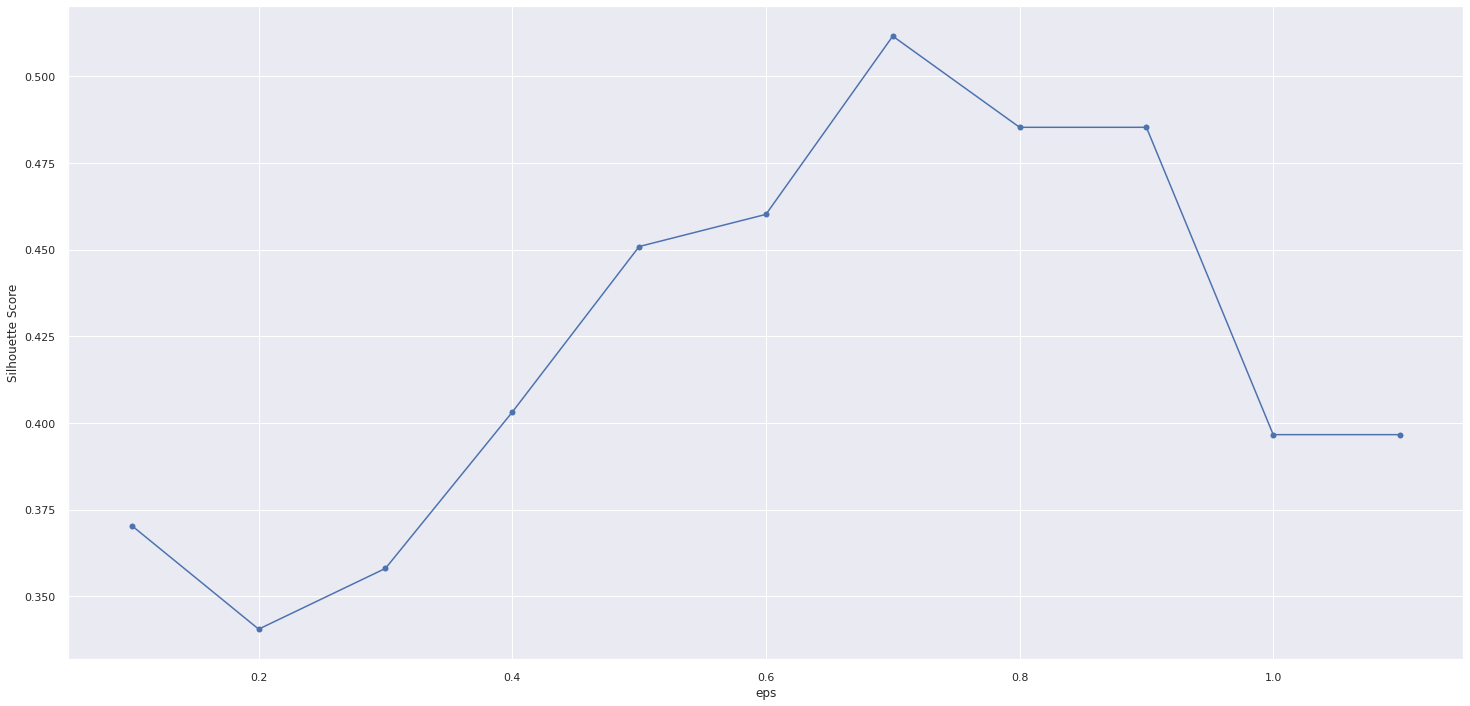

In [ ]:
# DBSCAN
# testing multiple values for eps
max_eps = 1.1

dbscan_silhouette = []
n_clust = []

for eps in np.arange(0.1 , max_eps+ 0.1, 0.1):
    # define model
    db_model = DBSCAN(eps = eps, min_samples = 20)
    # get labels
    labels = db_model.fit_predict(df7)

    # n_clusters
    current_nclust = len( np.unique(labels) )
    # metric
    sil = silhouette_score(df7, labels)
    dbscan_silhouette.append(sil)
    n_clust.append(current_nclust)

# ploting silhouette
plt.plot( np.arange(0.1 , max_eps+ 0.1, 0.1) , dbscan_silhouette, marker = 'o', color = 'b');
plt.xlabel('eps')
plt.ylabel('Silhouette Score')
plt.show();

In [ ]:
# DBSCAN
max_eps = 0.2

dbscan_silhouette = []
n_clust = []

for eps in np.arange(0.01 , max_eps+ 0.01, 0.01):
    # define model
    db_model = DBSCAN(eps = eps, min_samples = 20)
    # get labels
    labels = db_model.fit_predict(df7)

    # n_clusters
    current_nclust = len( np.unique(labels) )
    # metric
    sil = silhouette_score(df7, labels)
    dbscan_silhouette.append(sil)
    n_clust.append(current_nclust)

# ploting silhouette
plt.plot( np.arange(0.01 , max_eps+ 0.01, 0.1) , dbscan_silhouette, marker = 'o', color = 'b');
plt.xlabel('eps')
plt.ylabel('Silhouette Score')
plt.show();

### 7.3.2 Embedded Data

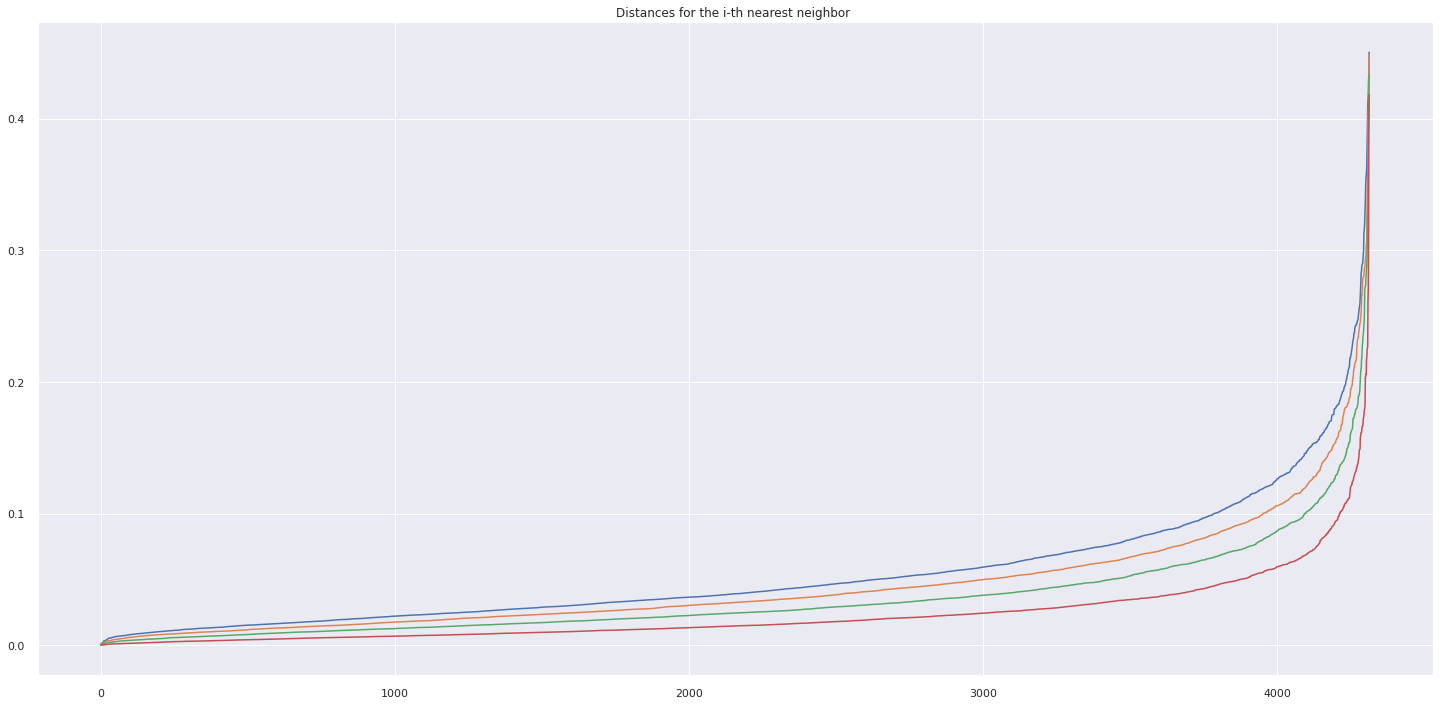

In [ ]:
# testing proposed tuning method
nn = NearestNeighbors(n_neighbors = 5)
nn.fit(df_tree)

dist, _ = nn.kneighbors(df_tree)

distances = np.sort(dist, axis = 0)

plt.title('Distances for the i-th nearest neighbor ')
plt.plot(distances[:, 4]);
plt.plot(distances[:, 3]);
plt.plot(distances[:, 2]);
plt.plot(distances[:, 1]);

# this method suggested an eps value that led to houdreds of clusters

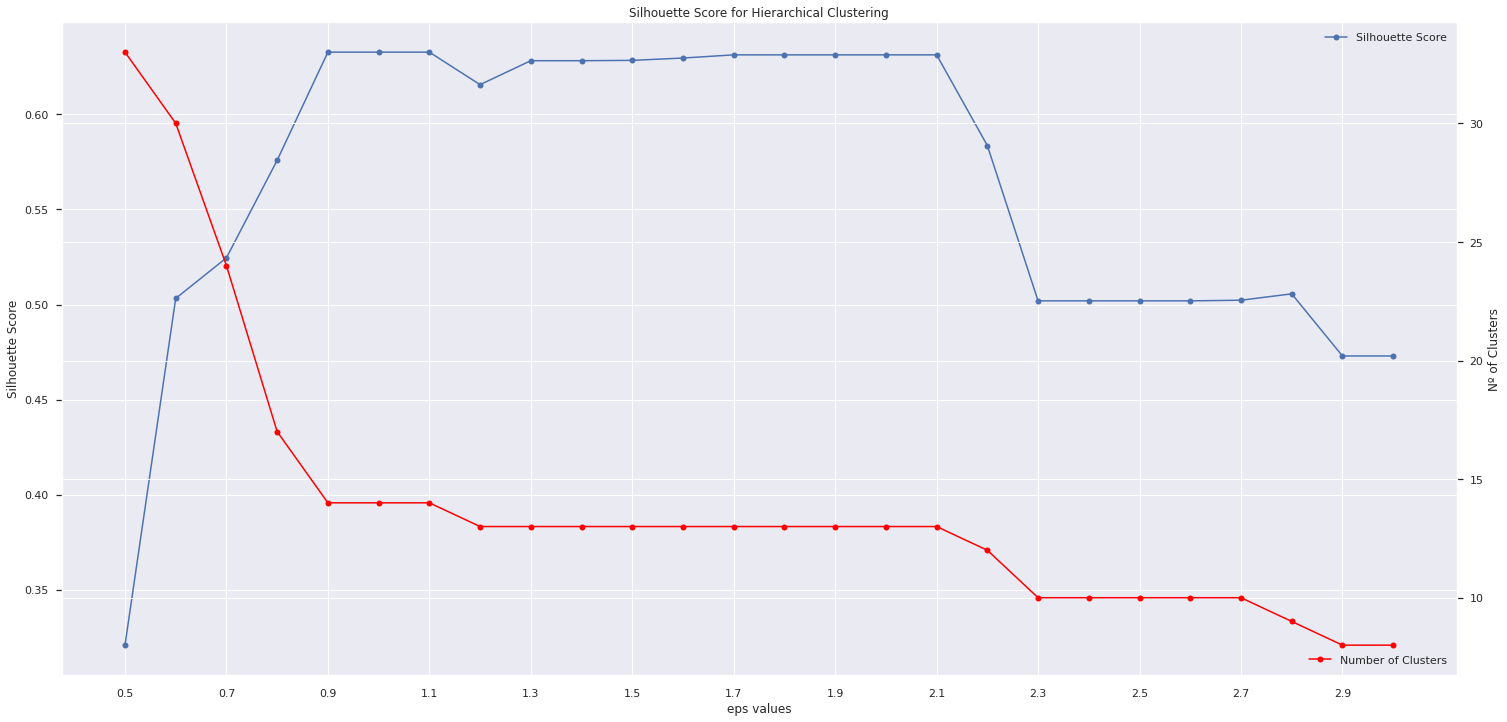

In [ ]:
# testing dbscan for a few epd values

eps_list = np.arange(0.5, 3.1, 0.1)

db_silhouette_emb = []
n_clusters = []

for eps in eps_list:
    # define model
    db_model = DBSCAN(eps = eps, min_samples = 50, metric = 'euclidean' )
    
    # get labels
    labels = db_model.fit_predict(df_tree)

    # metric
    sil = silhouette_score(df_tree, labels)
    db_silhouette_emb.append(sil)
    
    #nº of clusters
    n_clusters.append( len(np.unique(labels)) )

# ploting silhouette
fig, ax1 = plt.subplots( )

x = eps_list
ax1.set_title('Silhouette Score for Hierarchical Clustering')
ax1.set_xlabel('eps values')
ax1.set_ylabel('Silhouette Score')
ax1.set_xticks( np.arange(0.5, 3.1, 0.2) )
ax1.plot( x , db_silhouette_emb, marker = 'o', color = 'b', label = 'Silhouette Score');
ax1.legend(loc = 'upper right');

ax2 = ax1.twinx()
ax2.set_ylabel('Nº of Clusters')
ax2.plot(x, n_clusters, marker = 'o', color = 'red', label = 'Number of Clusters')
ax2.legend( loc = 'lower right');
ax2.set_yscale('linear')

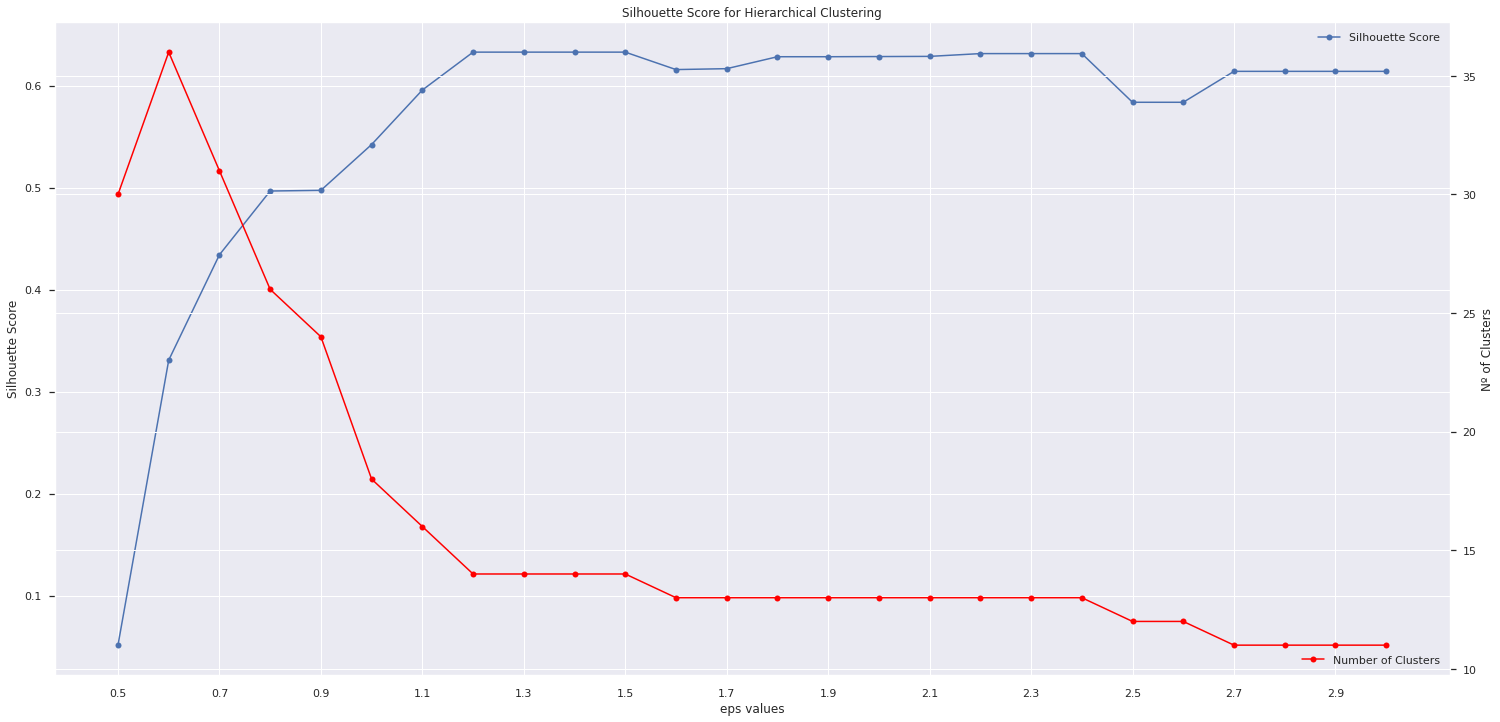

In [ ]:
# using manhattan to compute distances increases silhouette score, even though results are the same
eps_list = np.arange(0.5, 3.1, 0.1)

db_silhouette_emb = []
n_clusters = []

for eps in eps_list:
    # define model
    db_model = DBSCAN(eps = eps, min_samples = 50, metric = 'manhattan' )
    
    # get labels
    labels = db_model.fit_predict(df_tree)

    # metric
    sil = silhouette_score(df_tree, labels)
    db_silhouette_emb.append(sil)
    
    #nº of clusters
    n_clusters.append( len(np.unique(labels)) )

# ploting silhouette
fig, ax1 = plt.subplots( )

x = eps_list
ax1.set_title('Silhouette Score for Hierarchical Clustering')
ax1.set_xlabel('eps values')
ax1.set_ylabel('Silhouette Score')
ax1.set_xticks( np.arange(0.5, np.max(eps_list), 0.2) )
ax1.plot( x , db_silhouette_emb, marker = 'o', color = 'b', label = 'Silhouette Score');
ax1.legend(loc = 'upper right');

ax2 = ax1.twinx()
ax2.set_ylabel('Nº of Clusters')
ax2.plot(x, n_clusters, marker = 'o', color = 'red', label = 'Number of Clusters')
ax2.legend( loc = 'lower right');
ax2.set_yscale('linear')

Number of clusters: 12


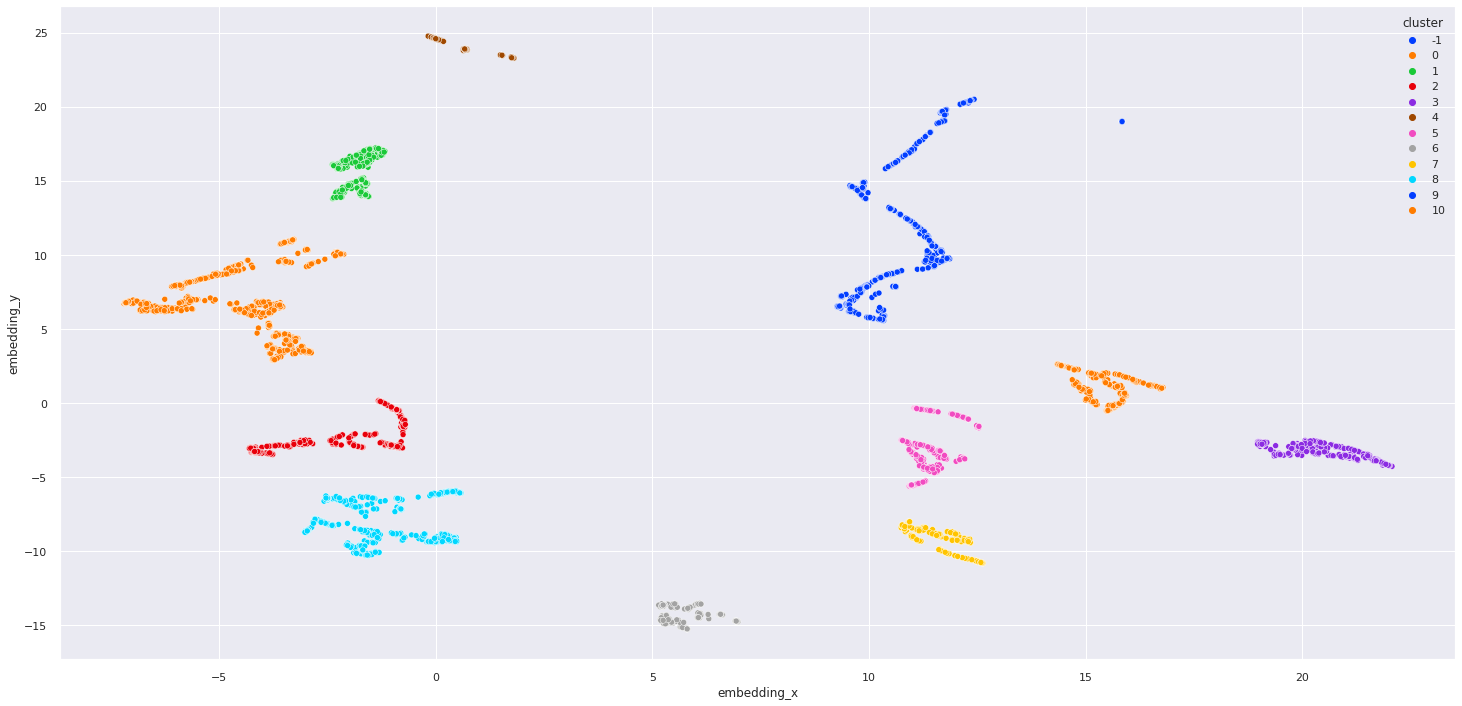

In [ ]:

db_model = DBSCAN(eps = 2.1, min_samples=50)

labels = db_model.fit_predict(df_tree)

df_res = df_tree.copy()
df_res['cluster'] = labels

sns.scatterplot(data = df_res, x = 'embedding_x', y = 'embedding_y', hue = 'cluster', palette = 'bright');

print('Number of clusters: {:}'.format(len(np.unique(labels))) )

Number of clusters: 13


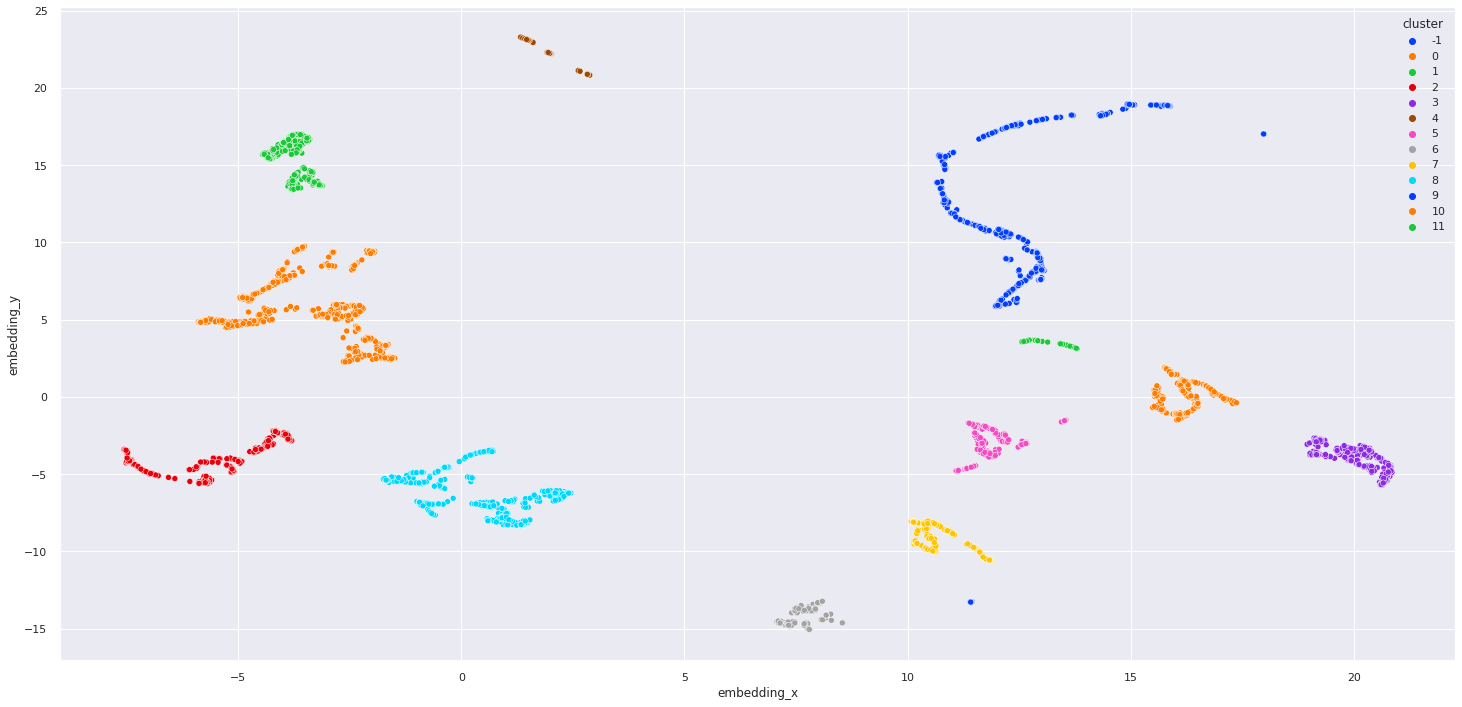

In [ ]:

db_model = DBSCAN(eps = 2.1, min_samples=50)

labels = db_model.fit_predict(df_tree)

df_res = df_tree.copy()
df_res['cluster'] = labels

sns.scatterplot(data = df_res, x = 'embedding_x', y = 'embedding_y', hue = 'cluster', palette = 'bright');

print('Number of clusters: {:}'.format(len(np.unique(labels))) )

In [ ]:
df_res = pd.concat( [df_tree, df5], axis = 1 )

px.scatter(df_res, x = 'embedding_x', y = 'embedding_y',  hover_data = ['revenue', 'qty_returned', 'frequency', 'recency'] )

## 7.4 AffinityPropagation


In [ ]:
# hyperparameters
damping = 0.8

# defining model
ap_model = AffinityPropagation( damping = damping, random_state=42)
labels = ap_model.fit_predict(df7)

print( 'Silhouette Score: {:,.4f}'.format(silhouette_score(df_prep, labels)) )
print( 'Number of Clusters: {}'.format(len(np.unique(labels))) )
print( 'Clusters: {}'.format(np.unique(labels)) )


Silhouette Score: 0.3130
Number of Clusters: 46
Clusters: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [ ]:
# hyperparameters
damping = 0.8

# defining model
ap_model = AffinityPropagation( damping = damping, random_state=42)
labels = ap_model.fit_predict(df7)

print( 'Silhouette Score: {:,.4f}'.format(silhouette_score(df_prep, labels)) )
print( 'Number of Clusters: {}'.format(len(np.unique(labels))) )
print( 'Clusters: {}'.format(np.unique(labels)) )


Silhouette Score: -0.0430
Number of Clusters: 29
Clusters: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]


This one did not converge or returned too many clusters (i.e. 46)

## 7.5 SpectralClustering


### 7.5.1 Rescaled Data

In [ ]:
# hyperparameters
n_clusters = 5
random_state = 42
affinity = 'rbf' # rbf, polynomial, poly, laplacian
n_jobs = -1

# defining model
sp_model = SpectralClustering(n_clusters = n_clusters, random_state = random_state, affinity = affinity, n_jobs = n_jobs)
labels = sp_model.fit_predict(df7)

# Checking Performance
print( 'Silhouette Score: {:,.4f}'.format(silhouette_score(df7, labels)) )
print( 'Number of Clusters: {}'.format(len(np.unique(labels))) )
print( 'Clusters: {}'.format(np.unique(labels)) )

Silhouette Score: 0.4902
Number of Clusters: 5
Clusters: [0 1 2 3 4]


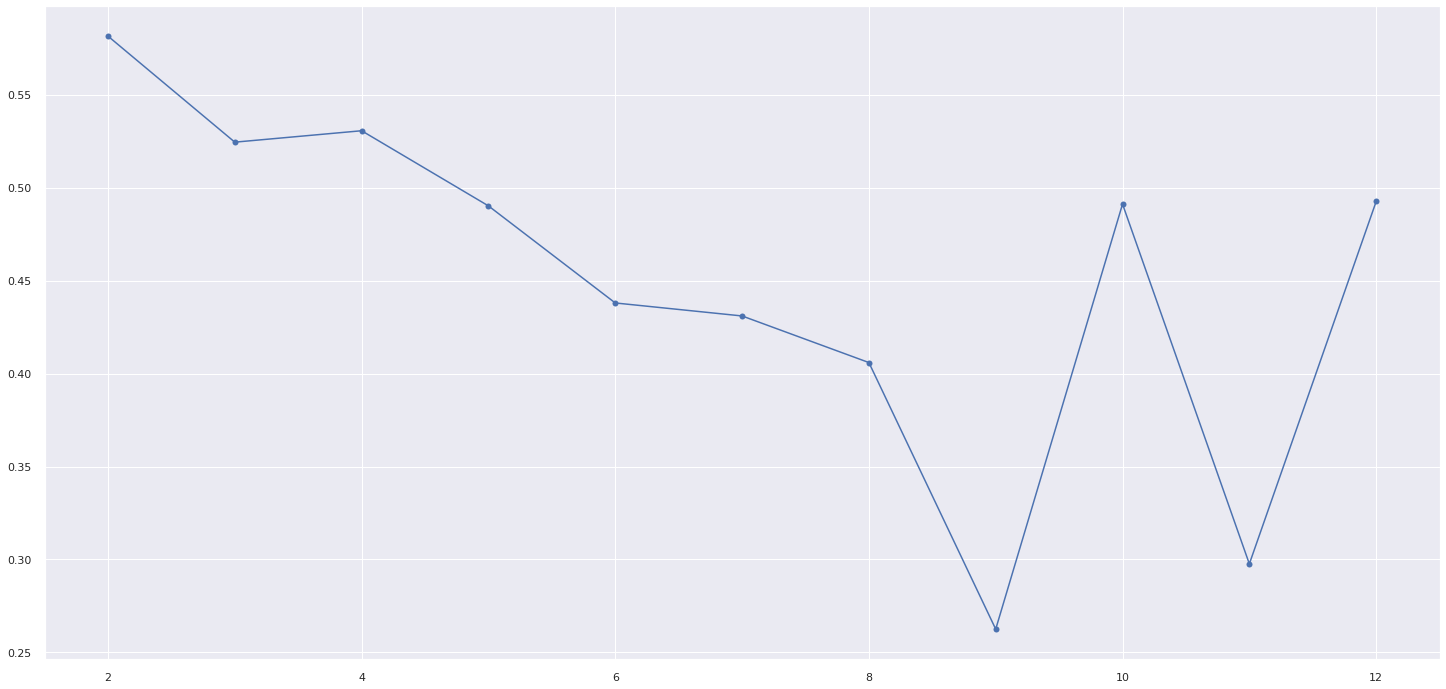

In [ ]:
# Spectral
n_max = 12

# hyperparameters
affinity = 'rbf' # rbf, polynomial, poly, laplacian

spc_silhouette = []
for n_clusters in range(2, n_max + 1):
    # define model
    sp_model = SpectralClustering(n_clusters = n_clusters, random_state = 42, affinity = affinity, n_jobs = -1)
    
    # get labels
    labels = sp_model.fit_predict(df7)

    # metric
    sil = silhouette_score(df7, labels)
    spc_silhouette.append(sil)

# ploting silhouette
plt.plot( range(2, n_max + 1) , spc_silhouette, marker = 'o', color = 'b');

In [ ]:
n_clusters = 12
affinity = 'rbf'
sp_model = SpectralClustering(n_clusters = n_clusters, random_state = 42, affinity = affinity, n_jobs = -1)
    
# get labels
labels = sp_model.fit_predict(df7)

# metric
sil = silhouette_score(df7, labels)
sil

0.4925401732463315

For n_clusters = 2 the average silhouette_score is : 0.5815
For n_clusters = 3 the average silhouette_score is : 0.5244
For n_clusters = 4 the average silhouette_score is : 0.5306
For n_clusters = 5 the average silhouette_score is : 0.4902
For n_clusters = 6 the average silhouette_score is : 0.4380
For n_clusters = 7 the average silhouette_score is : 0.4310


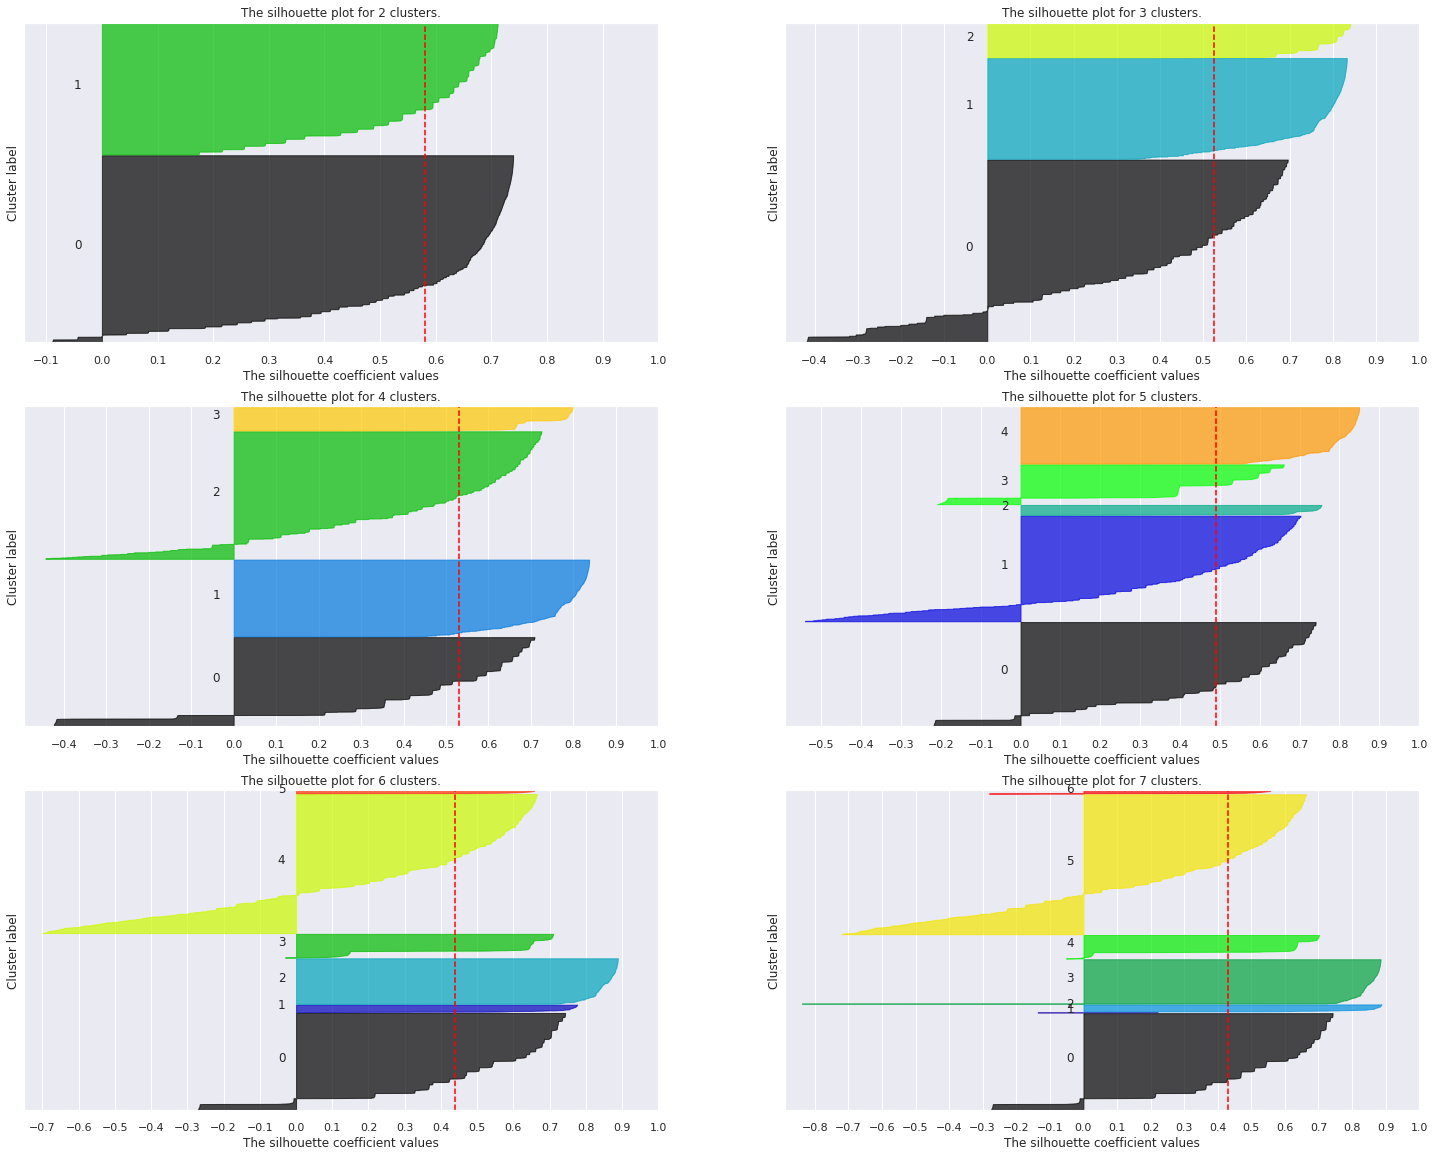

In [ ]:
clusters = np.arange(2,8)

n_rows = math.ceil( len(clusters)/2 )
fig, ax = plt.subplots(n_rows, 2, figsize = (25,20) )

for idx, n_clusters in enumerate( clusters ):
    # defining model
    affinity = 'rbf'
    sp_model = SpectralClustering(n_clusters = n_clusters, random_state = 42, affinity = affinity, n_jobs = -1)
    
    labels = sp_model.fit_predict(df7)

    # ploting silhouette
    row, col = divmod(idx, 2)
    plot_silhouette( df7, labels, ax[row][col] )

plt.show()

For n_clusters = 8 the average silhouette_score is : 0.4059
For n_clusters = 9 the average silhouette_score is : 0.2625
For n_clusters = 10 the average silhouette_score is : 0.4911
For n_clusters = 11 the average silhouette_score is : 0.2976
For n_clusters = 12 the average silhouette_score is : 0.4925
For n_clusters = 13 the average silhouette_score is : 0.4412
For n_clusters = 14 the average silhouette_score is : 0.3639
For n_clusters = 15 the average silhouette_score is : 0.4674


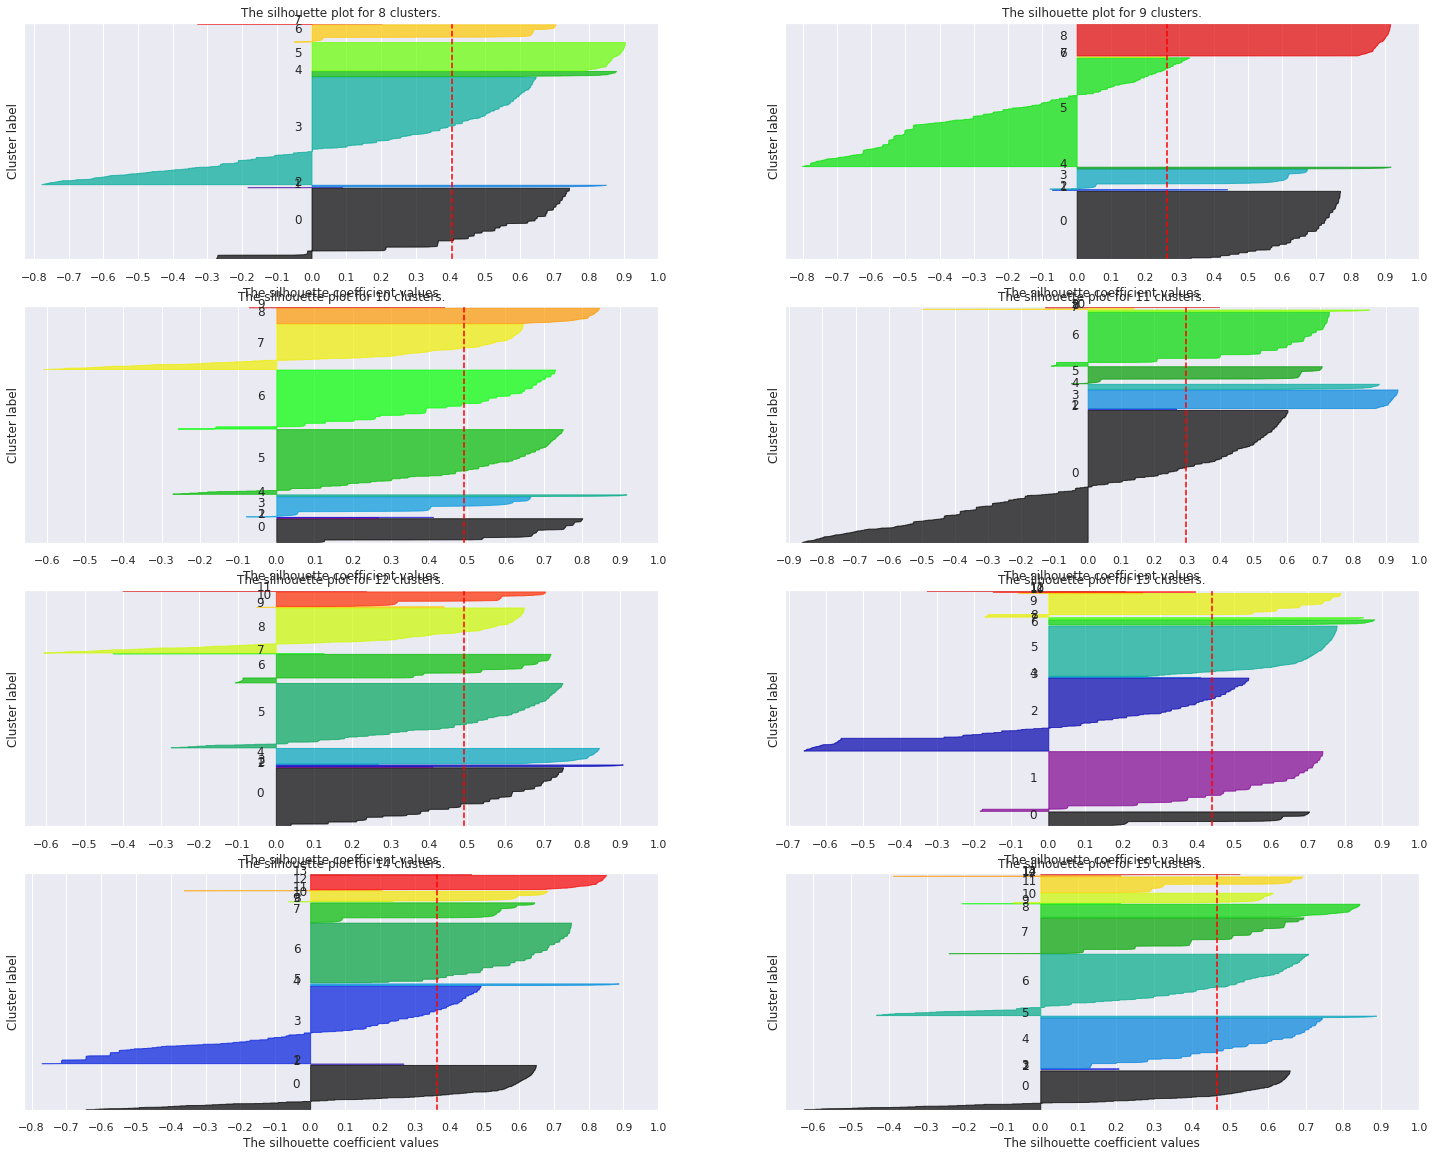

In [ ]:
clusters = np.arange(8,16)

n_rows = math.ceil( len(clusters)/2 )
fig, ax = plt.subplots(n_rows, 2, figsize = (25,20) )

for idx, n_clusters in enumerate( clusters ):
    # defining model
    affinity = 'rbf'
    sp_model = SpectralClustering(n_clusters = n_clusters, random_state = 42, affinity = affinity, n_jobs = -1)
    
    labels = sp_model.fit_predict(df7)

    # ploting silhouette
    row, col = divmod(idx, 2)
    plot_silhouette( df7, labels, ax[row][col] )

plt.show()

### 7.5.2 Embedded Data

In [ ]:
# rescaling df_tree using minmax in order to the spectral clustering algorithm work properly. 
# (The algorithm did not work with data on it's normal range, but worked on 0-1 range. May be due to the eigen_solver or rbf affinity)
pipe = make_pipeline( MinMaxScaler() )
df_tree_min_max = pd.DataFrame(pipe.fit_transform(df_tree))

sp_model = SpectralClustering(n_clusters = 5, random_state = 42, affinity = 'rbf')

# get labels
labels = sp_model.fit_predict(df_tree_min_max)

# metric
silhouette_score(df_tree_min_max, labels)

0.5172048

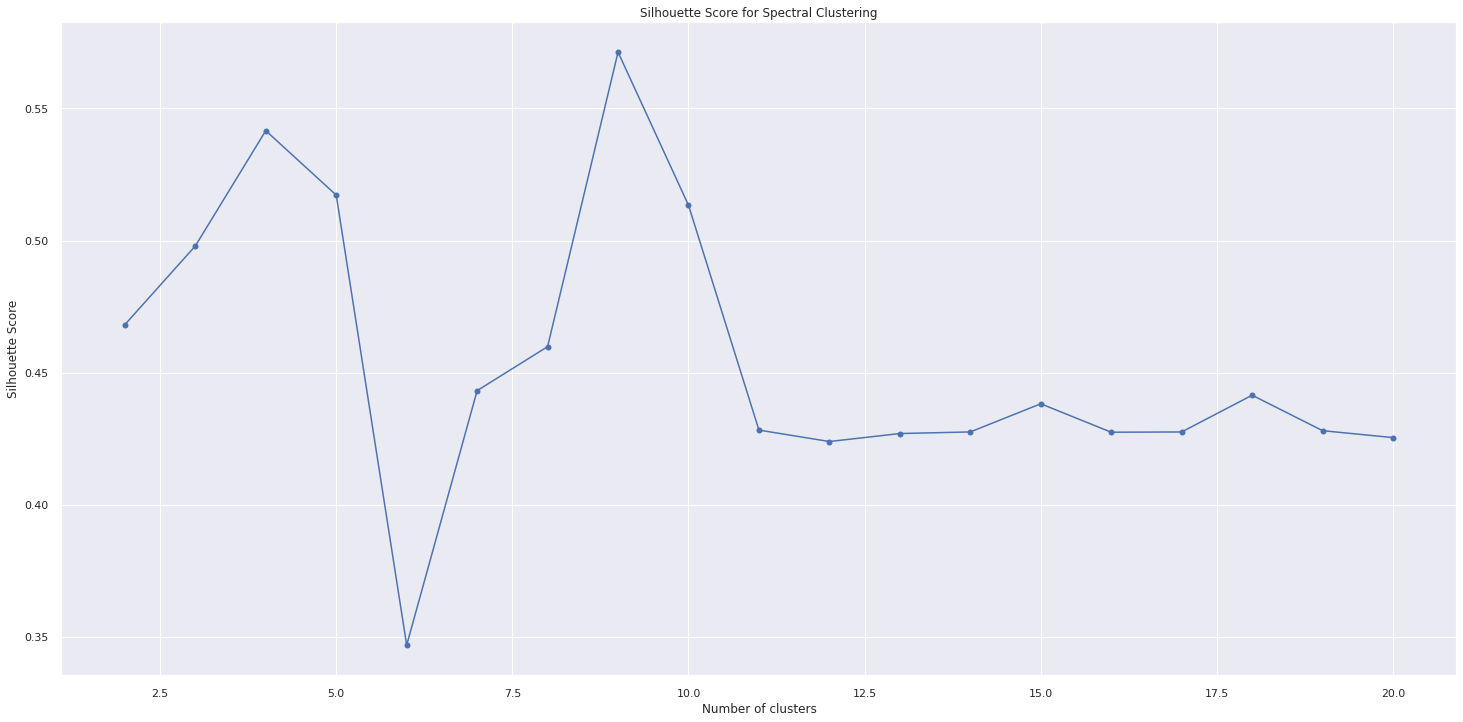

In [ ]:
# Spectral
n_max = 20

# hyperparameters
affinity = 'rbf' # rbf, polynomial, poly, laplacian

spc_silhouette_emb = []
for n_clusters in range(2, n_max + 1):
    # define model
    sp_model = SpectralClustering(n_clusters = n_clusters, random_state = 42, affinity = affinity, n_jobs = -1)
    
    # get labels
    labels = sp_model.fit_predict(df_tree_min_max)

    # metric
    sil = silhouette_score(df_tree_min_max, labels)
    spc_silhouette_emb.append(sil)

# ploting silhouette
plt.title('Silhouette Score for Spectral Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
# plt.xticks( np.arange(2, n_max+1, 2) )
plt.plot( range(2, n_max + 1) , spc_silhouette_emb, marker = 'o', color = 'b');

In [ ]:
n_clusters = 14

sp_model = SpectralClustering(n_clusters = n_clusters, random_state = 42, affinity = affinity, n_jobs = -1)

# get labels
labels = sp_model.fit_predict(df_tree_min_max)

# metric
sil = silhouette_score(df_tree_min_max, labels)

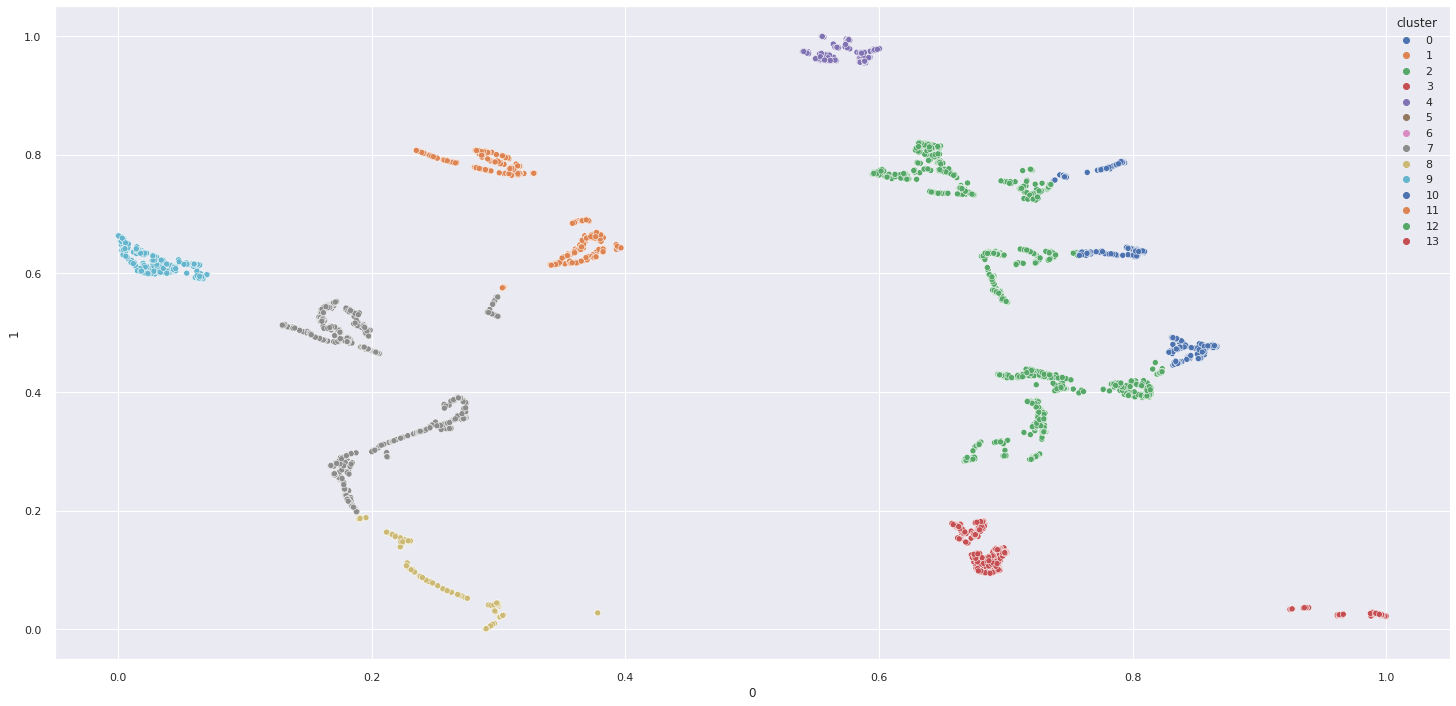

In [ ]:
df_res = df_tree_min_max.copy()
df_res['cluster'] = labels

sns.scatterplot(data = df_res, x = 0, y = 1, hue = 'cluster', palette = 'deep');

## 7.6 Gaussian Mixture


### 7.6.1 Rescaled Data

In [ ]:
# hyperparameters
n_components = 5
random_state = 42

# defining model
gm_model = GaussianMixture( n_components = n_components, random_state = random_state)
labels = gm_model.fit_predict(df7)

# Checking Performance
print( 'Silhouette Score: {:,.4f}'.format(silhouette_score(df7, labels)) )
print( 'Number of Clusters: {}'.format(len(np.unique(labels))) )

Silhouette Score: 0.0197
Number of Clusters: 5


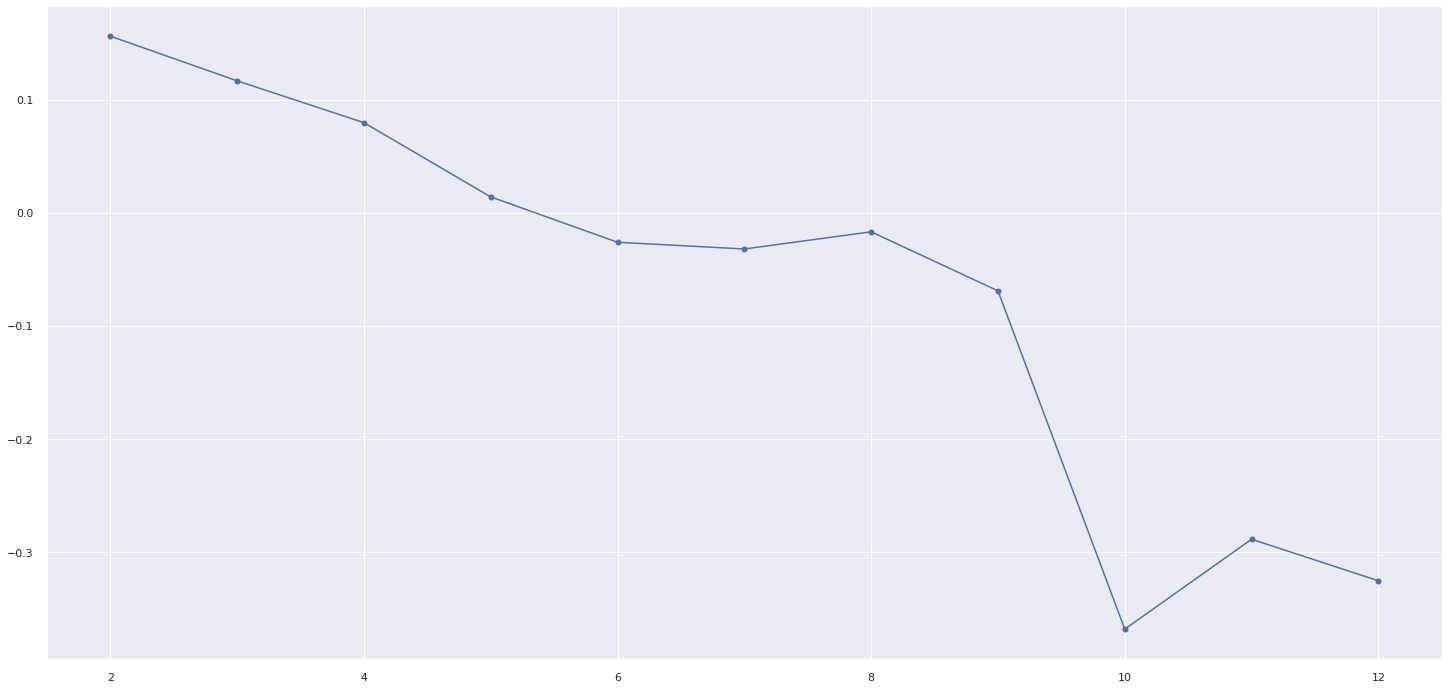

In [ ]:
# GMM 
n_max = 12

gmm_silhouette = []
for n_components in range(2, n_max + 1):
    # define model
    gmm = GaussianMixture(n_components = n_components)
    # get labels
    labels = gmm.fit_predict(df7)

    # metric
    sil = silhouette_score(df7, labels)
    gmm_silhouette.append(sil)

# ploting silhouette
plt.plot( range(2, n_max + 1) , gmm_silhouette, marker = 'o', color = 'b');

For n_clusters = 2 the average silhouette_score is : 0.1561
For n_clusters = 3 the average silhouette_score is : 0.1166
For n_clusters = 4 the average silhouette_score is : 0.0427
For n_clusters = 5 the average silhouette_score is : 0.0197
For n_clusters = 6 the average silhouette_score is : -0.0262
For n_clusters = 7 the average silhouette_score is : -0.0232


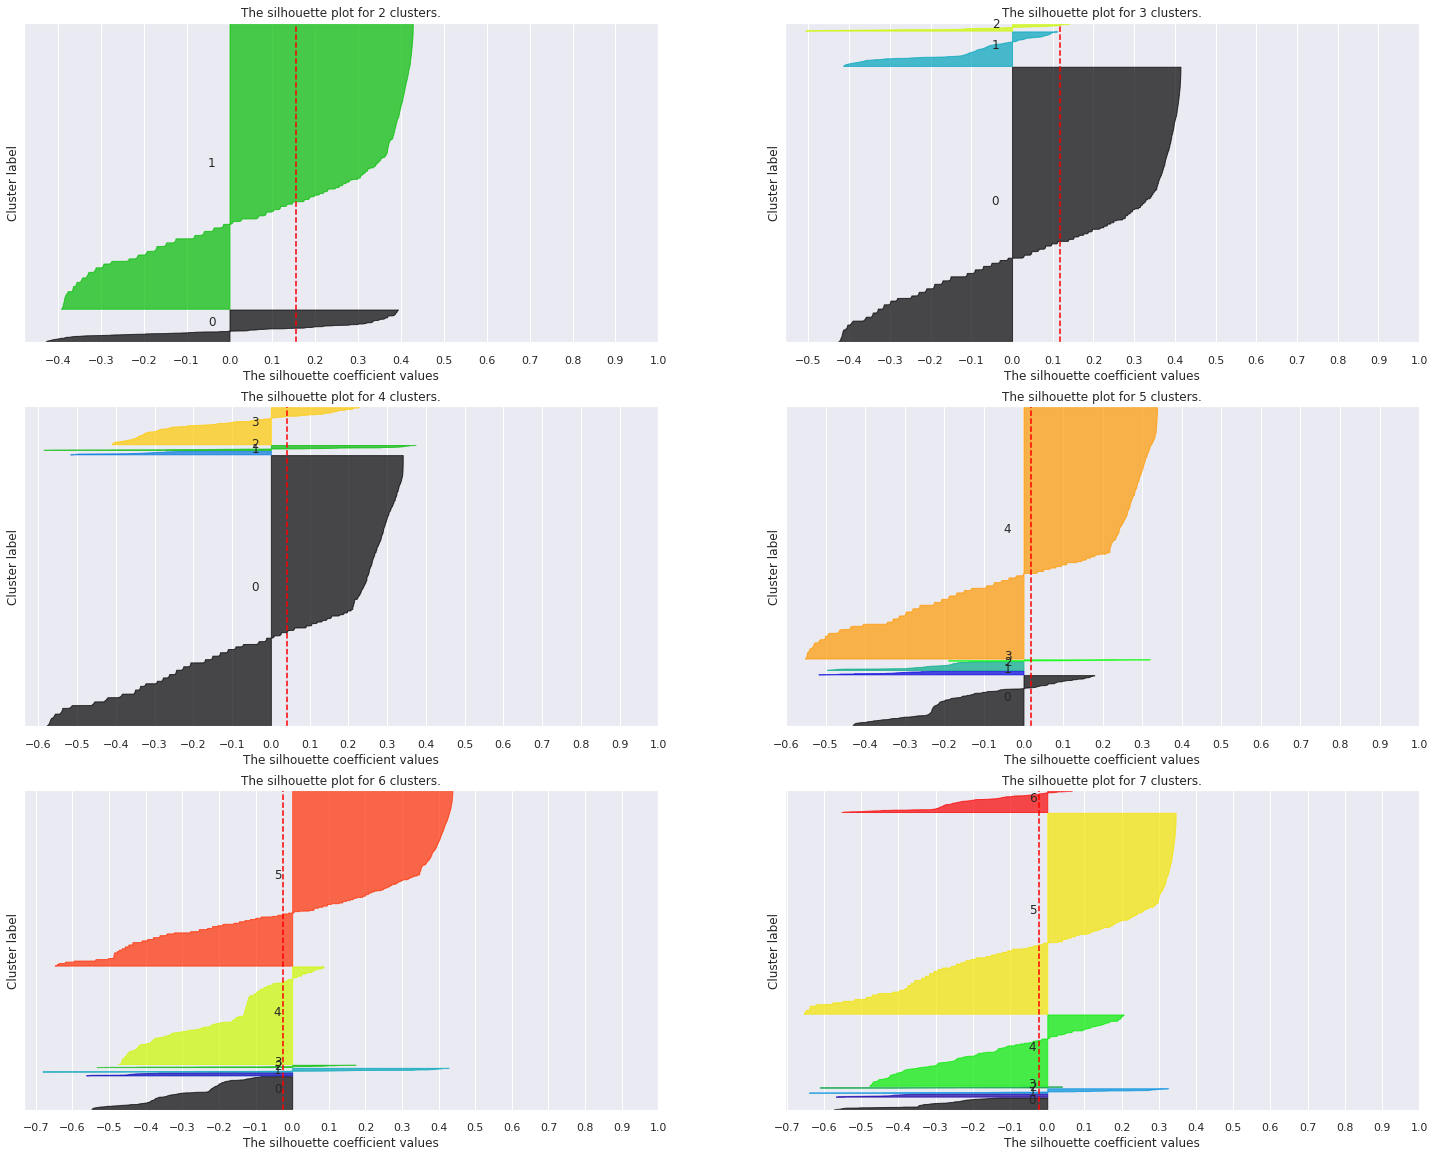

In [ ]:
# Taking a look at the results with our personalized function

clusters = np.arange(2,8)

# setting number of rows and defining a subplots instance
n_rows = math.ceil( len(clusters)/2 )
figg, ax = plt.subplots(n_rows, 2, figsize = (25,20))

for idx, n_clusters in enumerate(clusters):

    clusterer = GaussianMixture(n_components=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(df7)

    # since we are using 2 + figures subplots returns a 2d axes list (matrix)
    row, col = divmod(idx, 2)
    plot_silhouette(df7, cluster_labels, ax[row][col] )
    

For n_clusters = 8 the average silhouette_score is : -0.0118
For n_clusters = 9 the average silhouette_score is : -0.2224
For n_clusters = 10 the average silhouette_score is : -0.1431
For n_clusters = 11 the average silhouette_score is : -0.1371
For n_clusters = 12 the average silhouette_score is : -0.2024
For n_clusters = 13 the average silhouette_score is : -0.1716


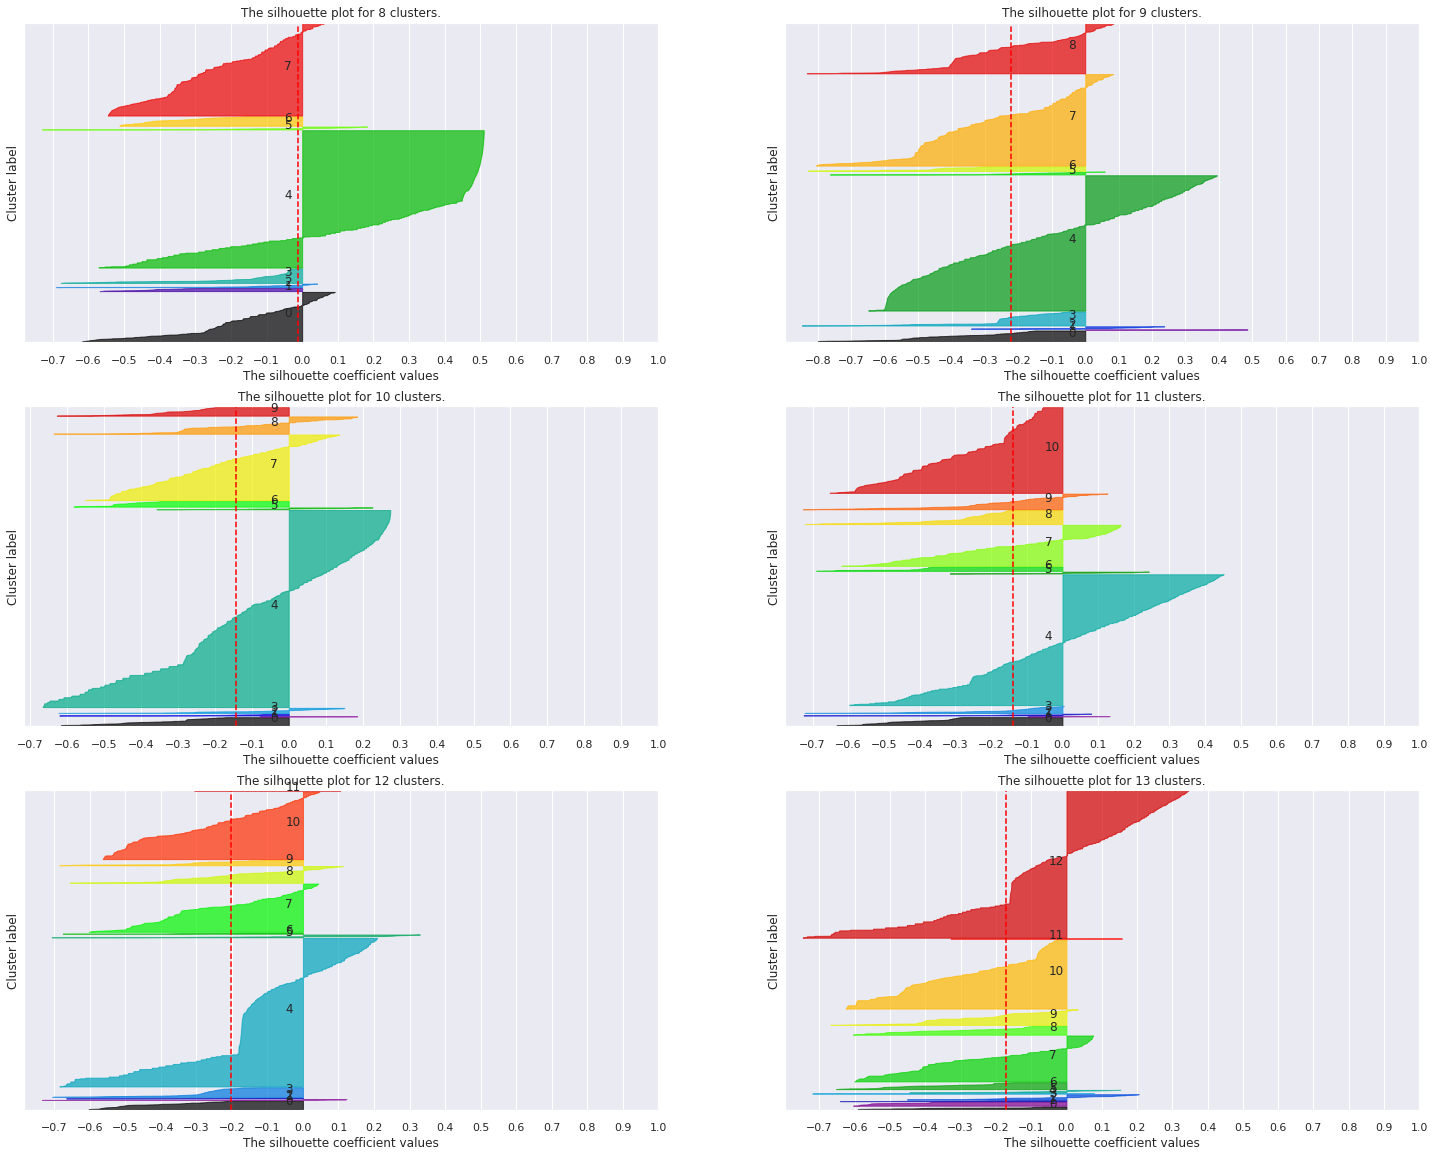

In [ ]:
# Taking a look at the results with our personalized function

clusters = np.arange(8,14)

# setting number of rows and defining a subplots instance
n_rows = math.ceil( len(clusters)/2 )
figg, ax = plt.subplots(n_rows, 2, figsize = (25,20))

for idx, n_clusters in enumerate(clusters):

    clusterer = GaussianMixture(n_components=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(df7)

    # since we are using 2 + figures subplots returns a 2d axes list (matrix)
    row, col = divmod(idx, 2)
    plot_silhouette(df7, cluster_labels, ax[row][col] )
    

### 7.6.2 Embedded Data

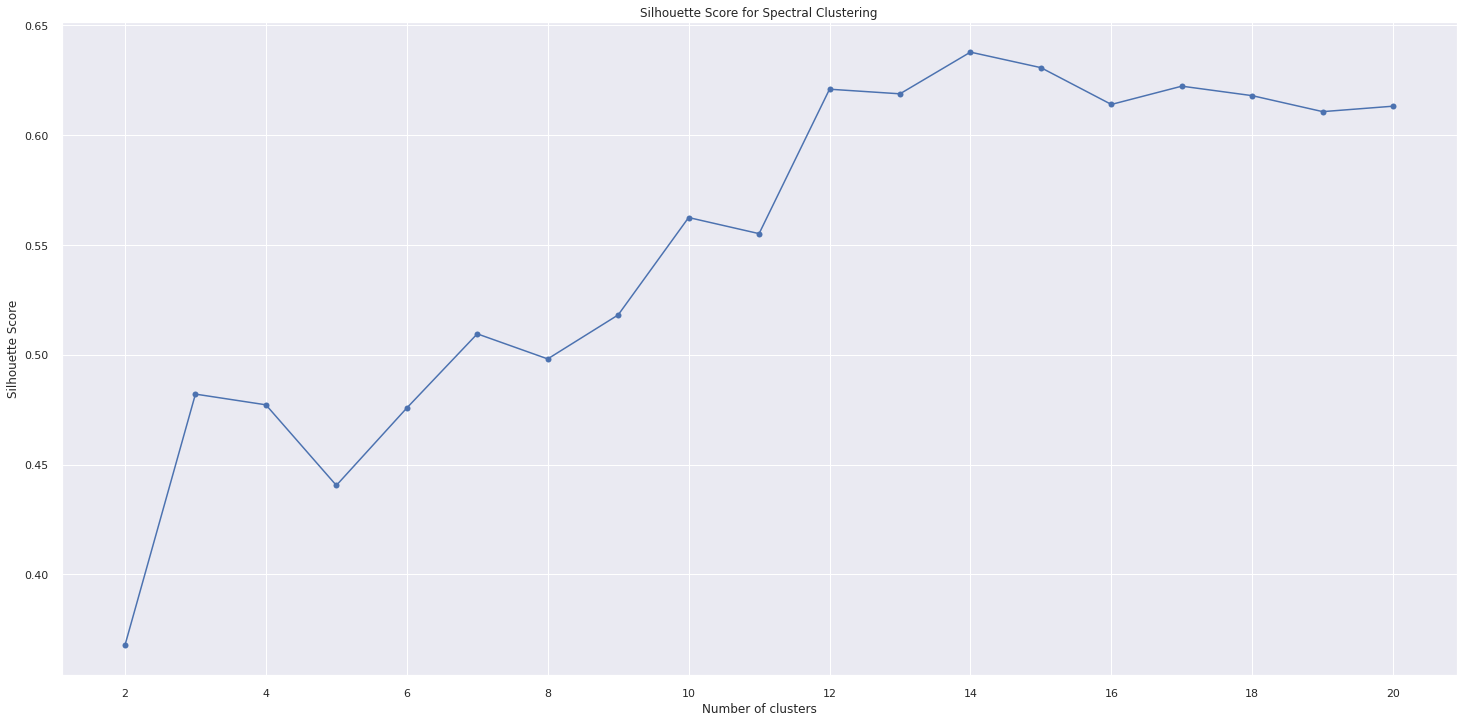

In [ ]:
# Gaussian Mixture
n_max = 20

# hyperparameters

gmm_silhouette_emb = []
for n_clusters in range(2, n_max + 1):
    # define model
    sp_model = GaussianMixture(n_components= n_clusters, random_state = 42)
    
    # get labels
    labels = sp_model.fit_predict(df_tree_min_max)

    # metric
    sil = silhouette_score(df_tree_min_max, labels)
    gmm_silhouette_emb.append(sil)

# ploting silhouette
plt.title('Silhouette Score for Spectral Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks( np.arange(2, n_max+1, 2) )
plt.plot( range(2, n_max + 1) , gmm_silhouette_emb, marker = 'o', color = 'b');

In [ ]:
# hyperparameters
n_components = 14

# defining model
gm_model = GaussianMixture( n_components = n_components, random_state = 42)
labels = gm_model.fit_predict(df_tree_min_max)

# Checking Performance
print( 'Silhouette Score: {:,.4f}'.format(silhouette_score(df_tree_min_max, labels)) )
print( 'Number of Clusters: {}'.format(len(np.unique(labels))) )

Silhouette Score: 0.6378
Number of Clusters: 14


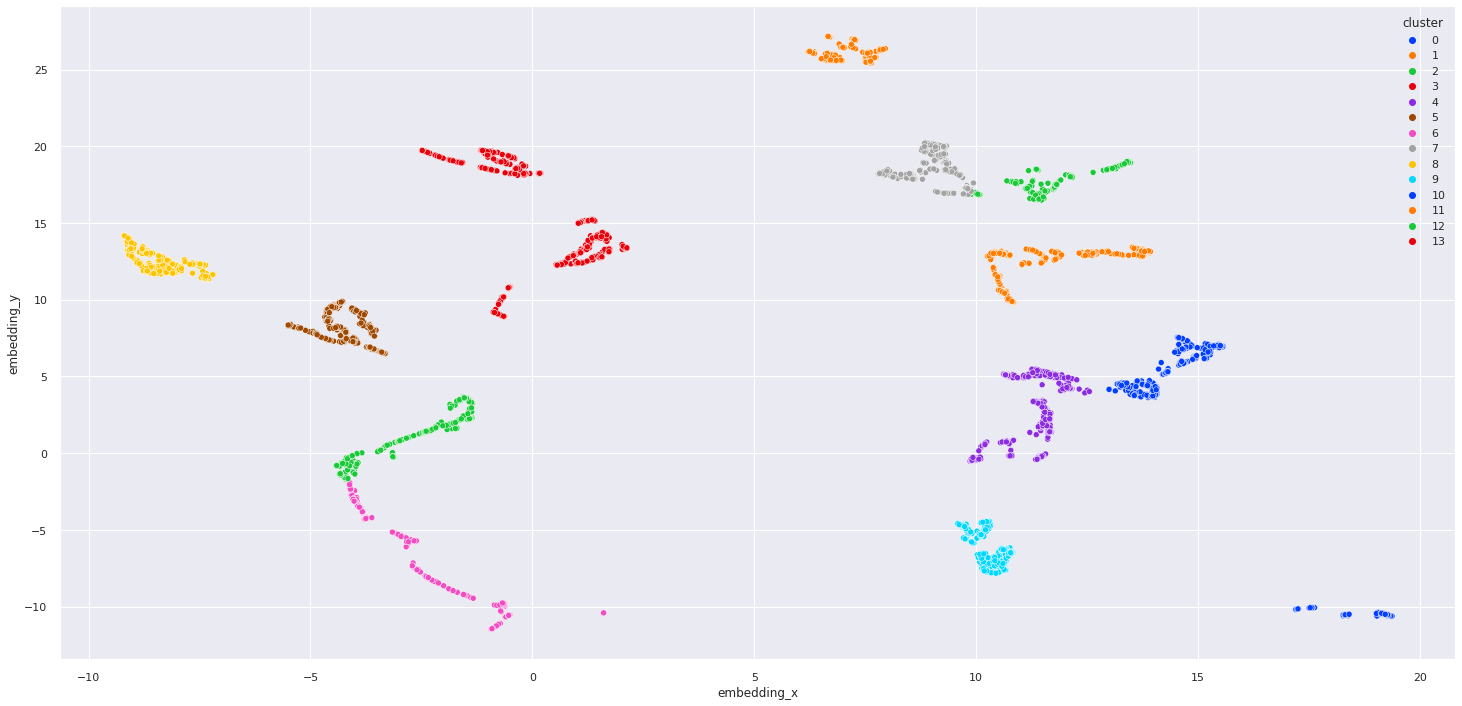

In [ ]:
df_res = df_tree.copy()
df_res['cluster'] = labels

sns.scatterplot(data = df_res, x = 'embedding_x', y = 'embedding_y', hue = 'cluster', palette = 'bright');

# 7.7 Comparing Model's Performances

### 7.7.1 Rescaled Data

In [ ]:
results = pd.DataFrame( { 'KMeans' : kmeans_silhouette,
                        #   'DBScan' : dbscan_silhouette,
                          'GMM' : gmm_silhouette,
                          'HC' : hc_silhouette,
                          'Spectral' : spc_silhouette } )
          
results = results.T
results.style.highlight_max( color='blue', axis=1 )

,0,1,2,3,4,5,6,7,8,9,10
KMeans,0.585361,0.573309,0.576484,0.570473,0.551406,0.544480,0.553197,0.547502,0.538266,0.534843,0.532392
GMM,0.156115,0.116607,0.079612,0.013965,-0.026162,-0.032127,-0.016947,-0.069148,-0.368317,-0.288803,-0.325535
HC,0.324804,0.234984,0.192467,0.160162,0.140895,0.105296,0.091346,0.079664,0.073204,0.014661,0.007257
Spectral,0.581471,0.524447,0.530588,0.490176,0.437967,0.430978,0.405917,0.262540,0.491135,0.297635,0.492540


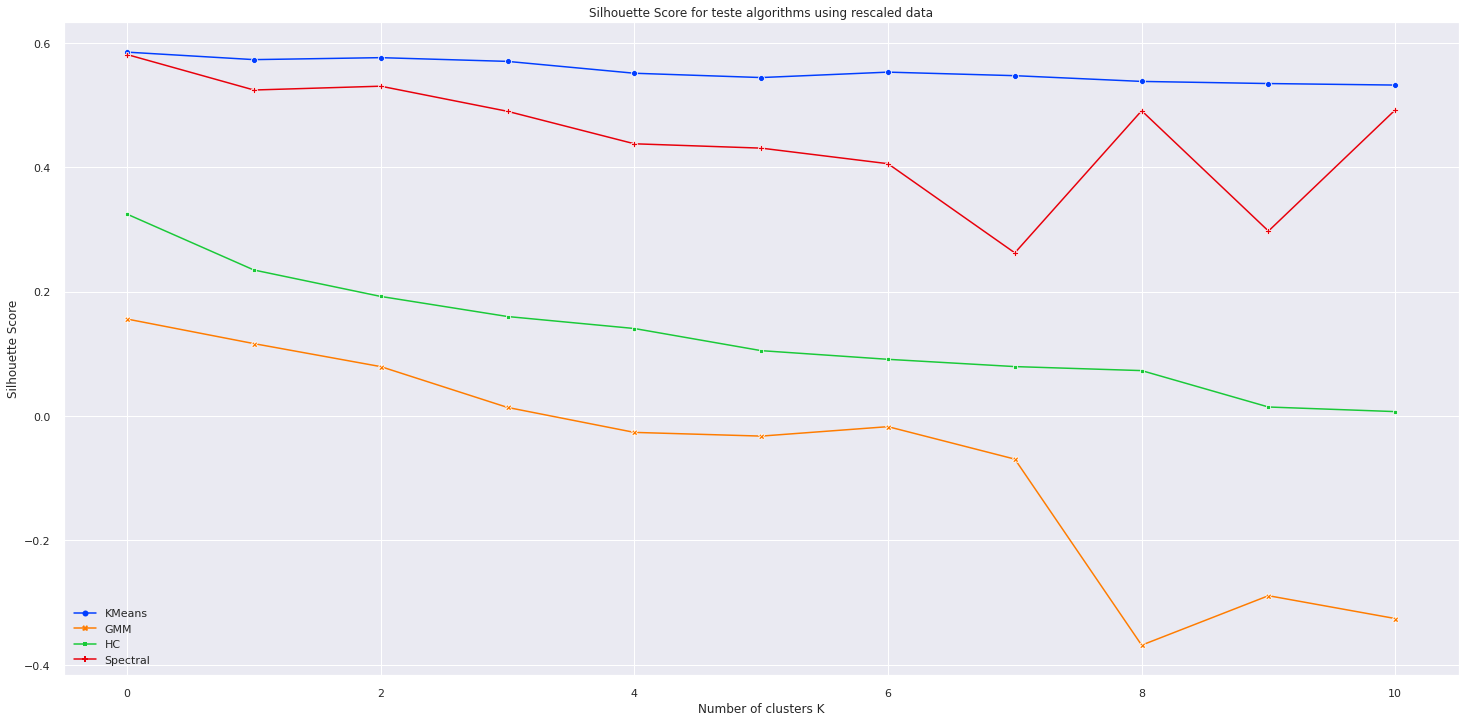

In [ ]:
plt.title('Silhouette Score for teste algorithms using rescaled data')
plt.xlabel('Number of clusters K')
plt.ylabel('Silhouette Score')
sns.lineplot(data = results.T, markers = True, palette = 'bright', dashes = False);
# sns.relplot(data = results.T, palette = 'bright', dashes = False);


### 7.7.2 Embedded Data

In [ ]:
results_emb = pd.DataFrame( { 'KMeans' : kmeans_silhouette_emb,
                          'DBScan' : db_silhouette_emb,
                          'GMM' : gmm_silhouette_emb,
                          'HC' : hc_silhouette_emb,
                          'Spectral' : spc_silhouette_emb } )
results_emb = results_emb.set_axis(np.arange(2,21, 1) )          
results_emb = results_emb.T
results_emb.style.highlight_max( color='blue', axis=1 )

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
KMeans,0.425433,0.488546,0.529328,0.547252,0.552025,0.578673,0.590655,0.603078,0.619148,0.641481,0.642280,0.662028,0.661147,0.648527,0.651492,0.657925,0.660709,0.643515,0.660375
DBScan,0.581334,0.558461,0.603458,0.632480,0.632480,0.632480,0.589893,0.589893,0.589893,0.589893,0.589893,0.589893,0.589893,0.583138,0.583138,0.583138,0.583138,0.626738,0.626738
GMM,0.367719,0.482064,0.477187,0.440488,0.475739,0.509511,0.498092,0.518130,0.562486,0.555152,0.620939,0.618839,0.637826,0.630762,0.613998,0.622322,0.617998,0.610724,0.613208
HC,0.425433,0.445175,0.529328,0.549449,0.559241,0.578673,0.585658,0.598081,0.615738,0.633287,0.634086,0.653477,0.660877,0.648256,0.649118,0.656393,0.653370,0.646819,0.646025
Spectral,0.468141,0.497928,0.541605,0.517205,0.346760,0.443147,0.459801,0.571344,0.513367,0.428203,0.423876,0.426900,0.427509,0.438169,0.427398,0.427498,0.441416,0.427987,0.425360


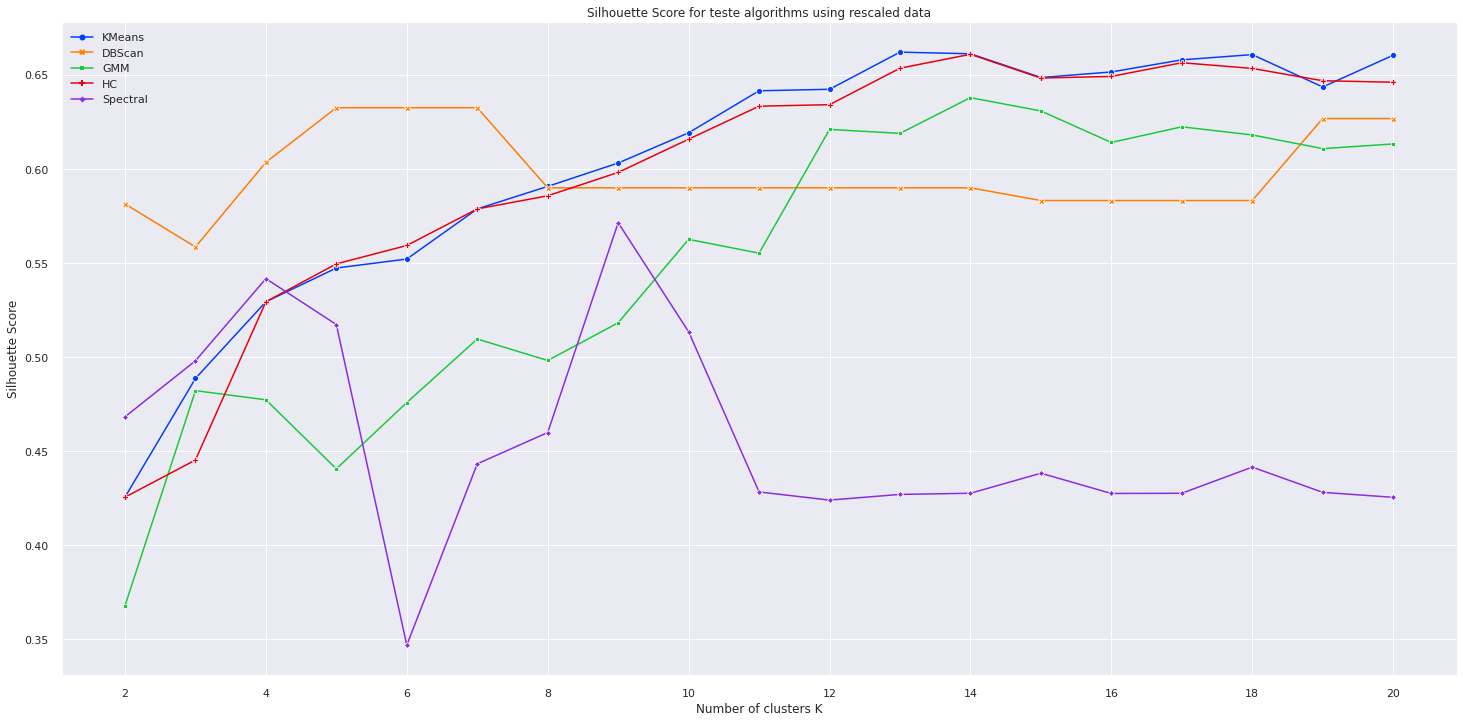

In [ ]:
plt.title('Silhouette Score for teste algorithms using rescaled data')
plt.xlabel('Number of clusters K')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(2,21, 2))
sns.lineplot(data = results_emb.T, markers = True, palette = 'bright', dashes = False);
# sns.relplot(data = results.T, palette = 'bright', dashes = False);

# sidenote: DBSCAN xaxis is not number of clusters, but eps. I just ploted it this way to compare silhouette coefficient.


## Final thoughts on the used algorithms
KMEANS, Hierarchical Clustering, and GMM performed well in terms of silhouette coefficient however they did not separate clusters well.

Regarding KMEANS and Gaussian Mixture it happened probably because clusters are not spherical, nor form clear Gaussians.

Spectral Clustering should have performed well since it relies on connections between data points and not their shape however, the algorithm was very slow and I couldn't afford the time to tune it properly.

Finally, DBSCAN was the best algorithm concerning proper cluster separation (even though its silhouette score was a bit lower than that of its pairs because silhouette coefficient is negatively affected by non-spherical clusters). I believe this algorithm performed well, given that it works based on densities no matter the form of the clusters.

# 8.0 Model Training

In [ ]:
labels.shape, df_tree.shape, df5.shape

((4314,), (4314, 2), (4314, 16))

In [ ]:
db_model = DBSCAN(eps = 2.1, min_samples=50)
labels = db_model.fit_predict(df_tree)
df_res = df_tree.copy()
df_res['cluster'] = labels.astype(str)
df_res = pd.concat( [df_res, df5], axis = 1 )

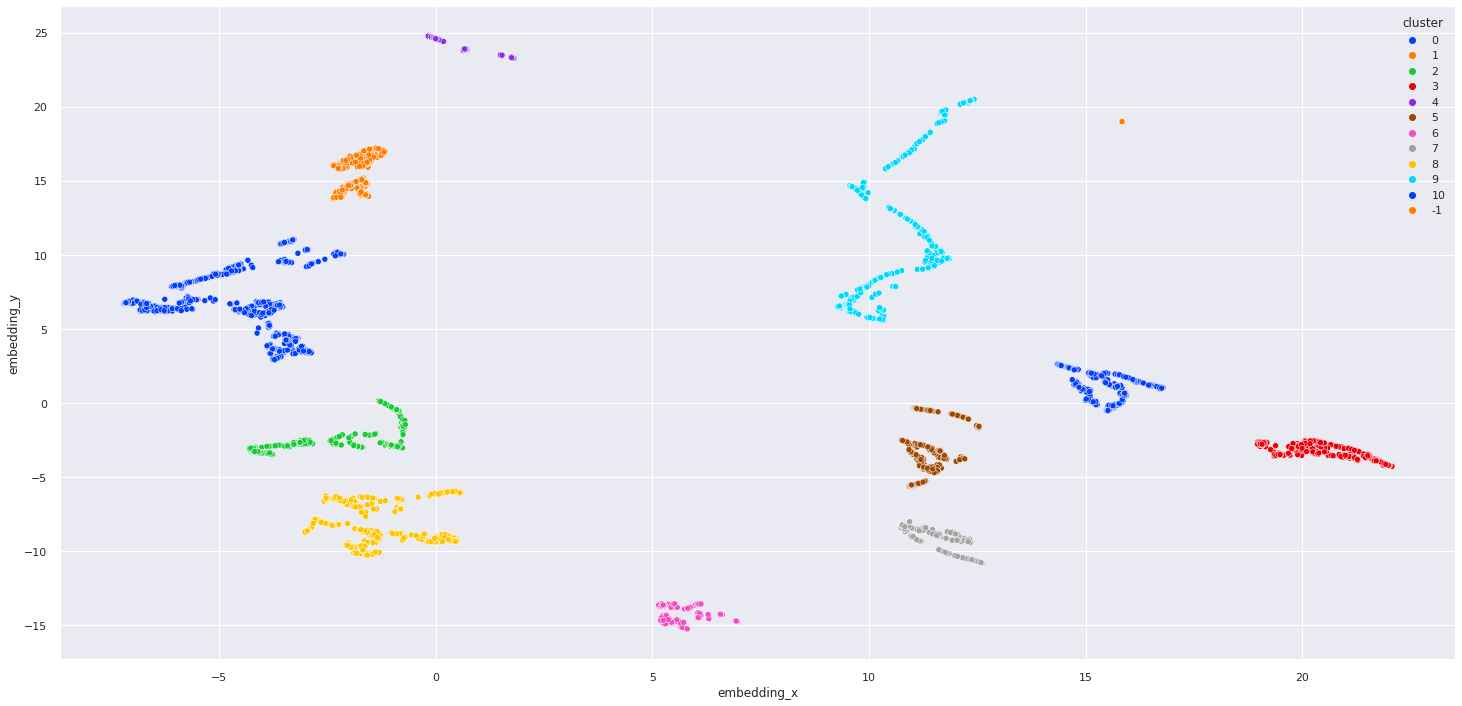

In [ ]:
sns.scatterplot(data = df_res, x = 'embedding_x', y = 'embedding_y', hue = 'cluster', palette = 'bright');

In [ ]:
# selecting data
df8 = df_tree.copy()

# df5.reset_index(drop = True, inplace = True)
# df_tree.reset_index(drop = True, inplace = True)

db_model = DBSCAN(eps = 2.1, min_samples=50)

labels = db_model.fit_predict(df_tree)

df_result = df5.copy()

# converting frequency to monthly frequency
# df_result['frequency'] = df_result['frequency']*30
df_result = pd.concat( [df_result, df_tree], axis = 1 )

df_result['cluster'] = labels.astype(str)
df_result.head()

# droping noisy points (32 customers)

# select index of customers to drop
# drop_idxs = list(df_result[df_result['cluster'] == '-1'].index.astype(int) )

# df_tree.drop(df_tree.index[drop_idxs], inplace = True )
# df_result.drop( df_result.index[drop_idxs], inplace = True )
# df_tree.shape

,customer_id,country,recency,avg_days_bw_purchases,num_purchases,date_range,frequency,revenue,avg_ticket,qty_items,avg_basket_size,avg_unique_prods,returns_revenue,avg_return_revenue,num_returns,qty_returned,embedding_x,embedding_y,cluster
0,17850,United Kingdom,373,1.000000,34,1,34.000000,5288.63,155.547941,1693,48.371429,8.735294,-102.58,-6.838667,15.0,-40.0,-3.543982,9.718514,0
1,13047,United Kingdom,57,52.833333,9,317,0.028391,3089.10,343.233333,1355,84.687500,19.000000,-143.49,-6.238696,23.0,-35.0,-4.025312,8.022521,0
2,12583,France,3,26.500000,15,371,0.040431,6629.34,441.956000,4978,292.823529,15.466667,-76.04,-25.346667,3.0,-50.0,-3.534883,16.845985,1
3,13748,United Kingdom,96,92.666667,5,278,0.017986,948.25,189.650000,439,87.800000,5.600000,0.00,0.000000,0.0,0.0,-6.975824,-4.942078,2
4,15100,United Kingdom,334,20.000000,3,40,0.075000,635.10,211.700000,58,9.666667,1.000000,-240.90,-80.300000,3.0,-22.0,19.139286,-2.679391,3
